## Credit Card Fraud Detection

This capstone project is jointly done by
1. Ankit
2. Ankit Pandey
3. Akella Venkata Koushik

## Know the project objective!:
The project focuses on training a model that can effectively distinguish a fraudelent transaction from a genuine transaction. the data set has been obtained from Kaggle platform:
_*https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud*_

## Know the dataset!:
This dataset specifically consists of all the credit card transactions done by European card holders in just two days in the month of September, 2013.
The data comprises of 2,84,807 transactions of which, 2,84,315 are genuine and remaining 492 are fraudelent transactions. Also the data has been transformed with PCA to protect the sensitive card customer details. The class is the response variable which takes either 0 or 1 for its value, where 0 means the transaction is not fraudelent and 1 means it is a fraud transaction.

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Here we will observe the distribution of our classes

In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [ ]:
print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


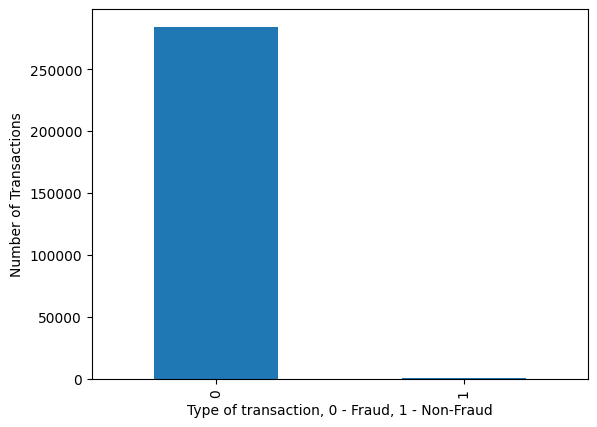

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
df.Class.value_counts().plot(kind = 'bar')
plt.xlabel("Type of transaction, 0 - Fraud, 1 - Non-Fraud")
plt.ylabel("Number of Transactions")
plt.show()

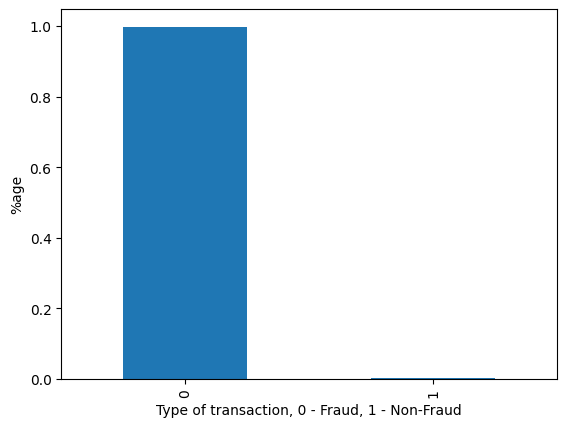

In [ ]:
df.Class.value_counts(normalize=True).plot(kind='bar')
plt.xlabel("Type of transaction, 0 - Fraud, 1 - Non-Fraud")
plt.ylabel("%age")
plt.show()

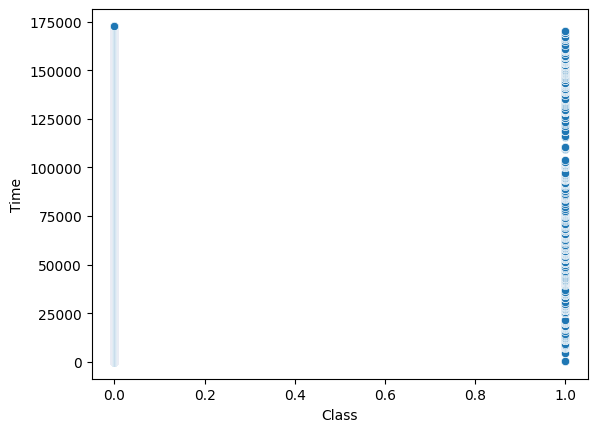

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(data = df, x = 'Class', y = 'Time')
plt.show()

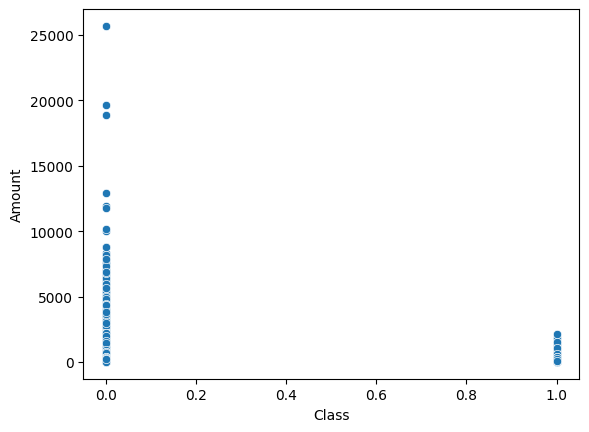

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(data = df, x = 'Class', y = 'Amount')
plt.show()

In [ ]:
# Drop unnecessary columns
df.drop("Time", axis = 1, inplace = True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Splitting the data into train & test data

In [ ]:
df1 = df.copy
y= df.pop('Class')
#class variable
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
df.shape

(284807, 29)

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.30, random_state=42)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [ ]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
356
136


### Plotting the distribution of a variable

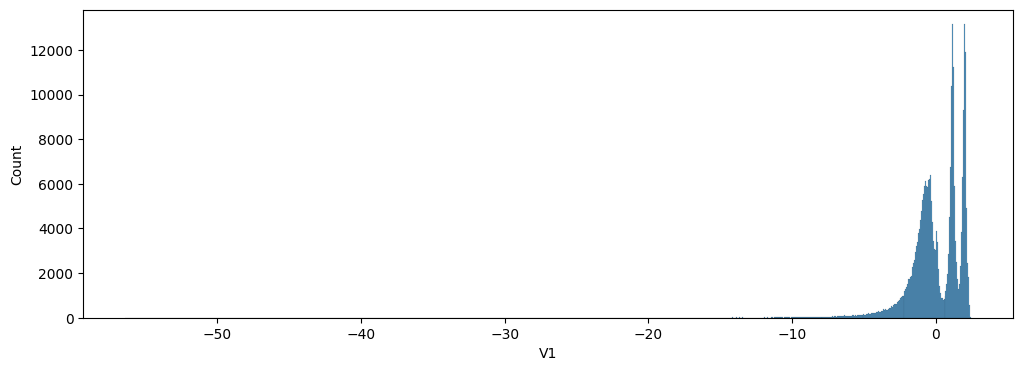

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
plt.figure(figsize=(12,4))
sns.histplot(df.V1)
plt.show()

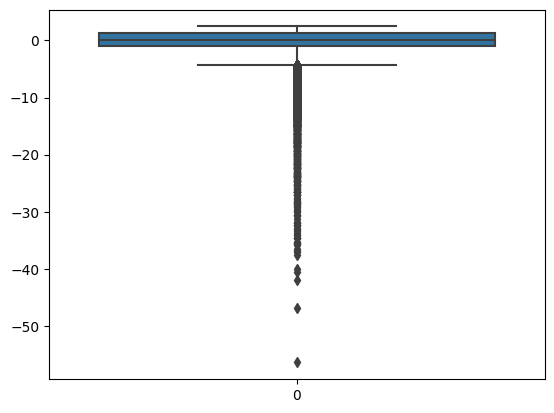

In [ ]:
sns.boxplot(df.V1)
plt.show()

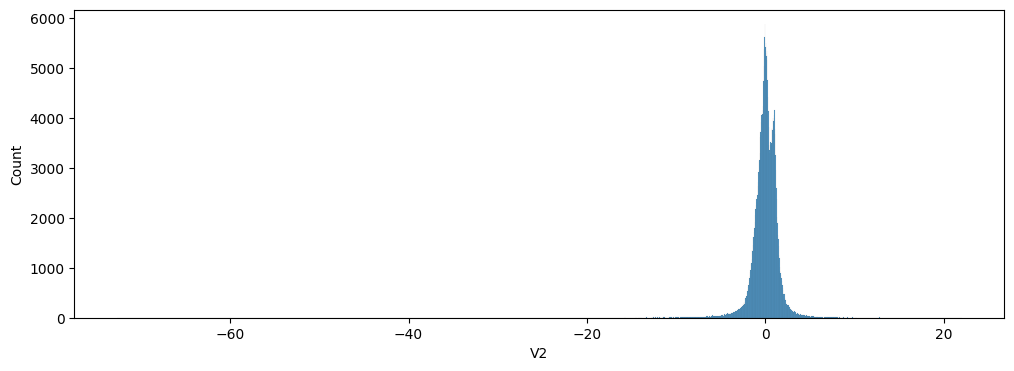

In [ ]:
# Plotting the 2nd variable to check skewness
plt.figure(figsize=(12,4))
sns.histplot(df.V2)
plt.show()

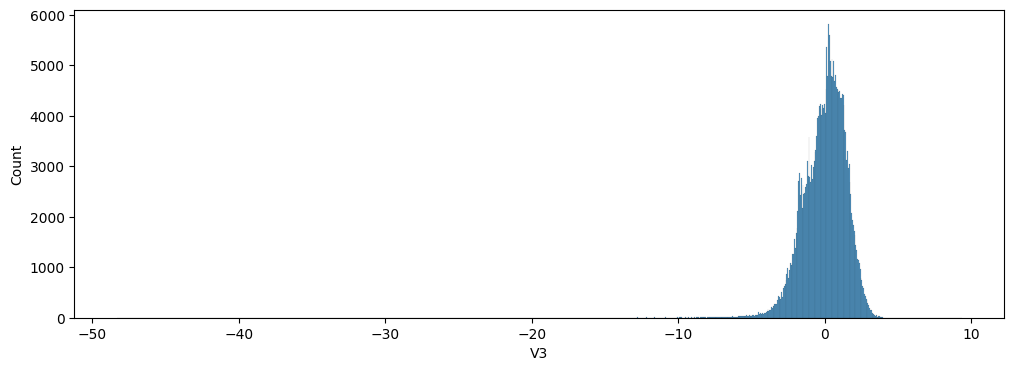

In [ ]:
# Plotting the 3rd variable to check skewness
plt.figure(figsize=(12,4))
sns.histplot(df.V3)
plt.show()

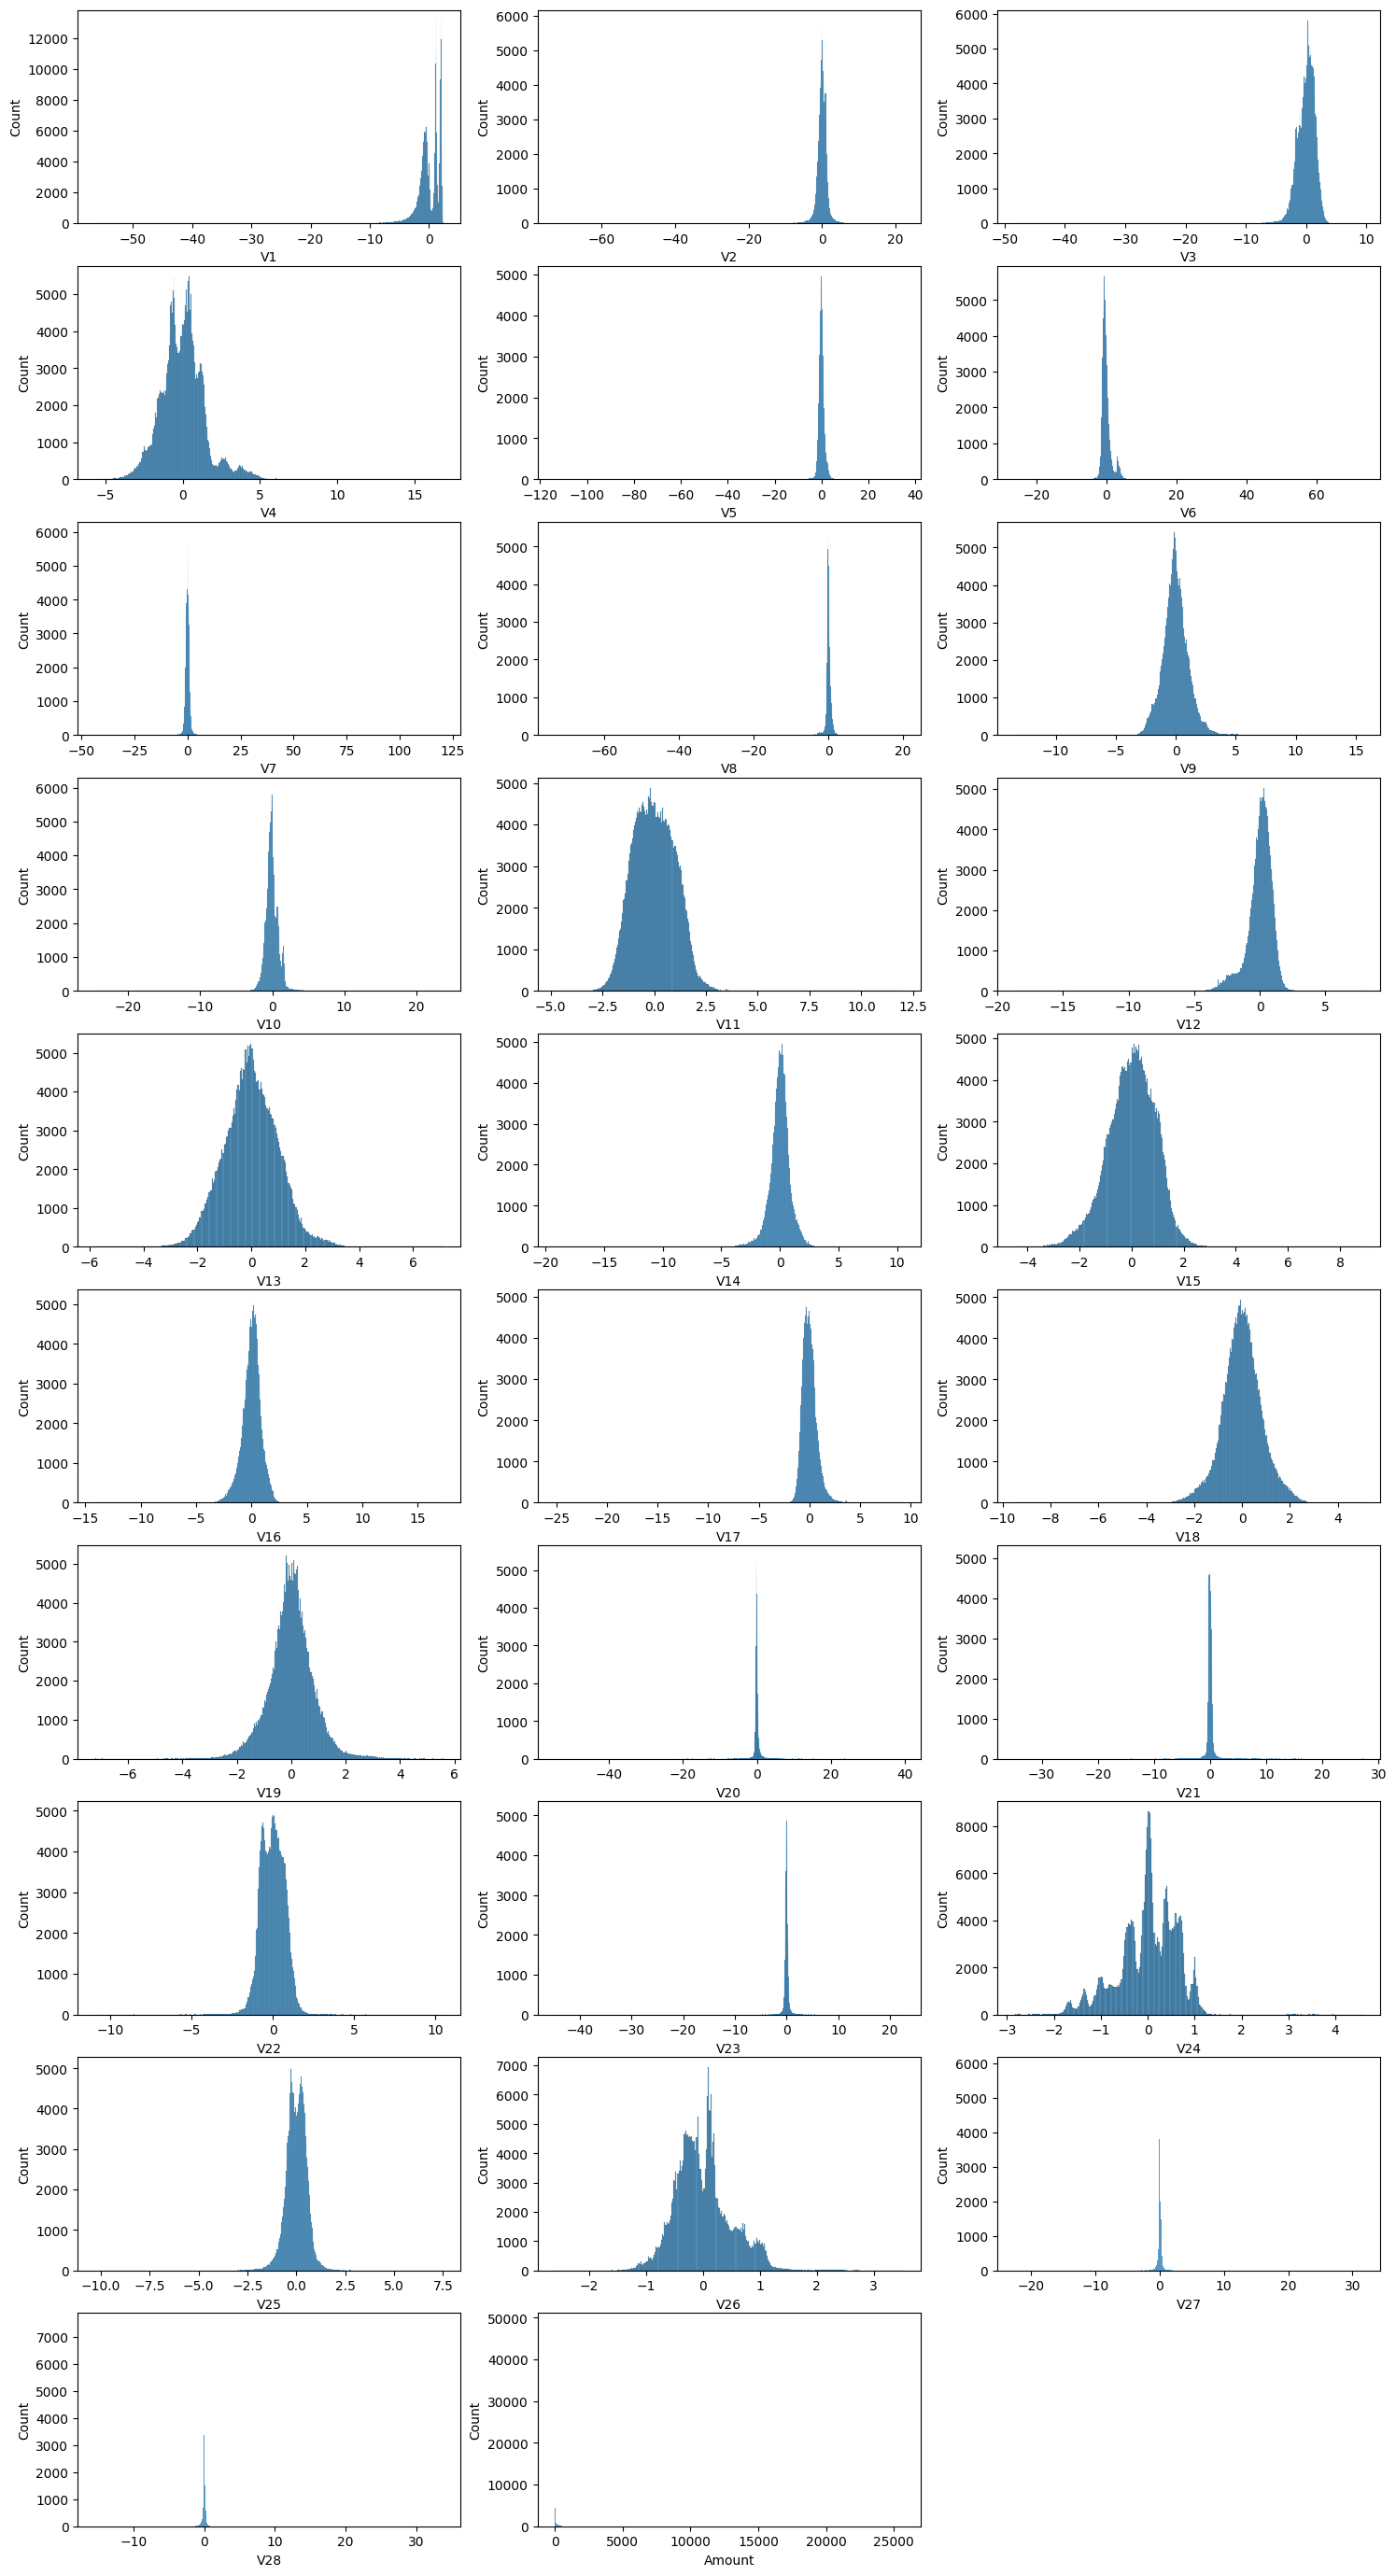

In [ ]:
# Checking all the variable for the skewness
plt.figure(figsize=(18,35))

plt.subplot(10,3,1)
sns.histplot(df.V1)

plt.subplot(10,3,2)
sns.histplot(df.V2)

plt.subplot(10,3,3)
sns.histplot(df.V3)

plt.subplot(10,3,4)
sns.histplot(df.V4)

plt.subplot(10,3,5)
sns.histplot(df.V5)

plt.subplot(10,3,6)
sns.histplot(df.V6)

plt.subplot(10,3,7)
sns.histplot(df.V7)

plt.subplot(10,3,8)
sns.histplot(df.V8)

plt.subplot(10,3,9)
sns.histplot(df.V9)

plt.subplot(10,3,10)
sns.histplot(df.V10)

plt.subplot(10,3,11)
sns.histplot(df.V11)

plt.subplot(10,3,12)
sns.histplot(df.V12)

plt.subplot(10,3,13)
sns.histplot(df.V13)

plt.subplot(10,3,14)
sns.histplot(df.V14)

plt.subplot(10,3,15)
sns.histplot(df.V15)

plt.subplot(10,3,16)
sns.histplot(df.V16)

plt.subplot(10,3,17)
sns.histplot(df.V17)

plt.subplot(10,3,18)
sns.histplot(df.V18)

plt.subplot(10,3,19)
sns.histplot(df.V19)

plt.subplot(10,3,20)
sns.histplot(df.V20)

plt.subplot(10,3,21)
sns.histplot(df.V21)

plt.subplot(10,3,22)
sns.histplot(df.V22)

plt.subplot(10,3,23)
sns.histplot(df.V23)

plt.subplot(10,3,24)
sns.histplot(df.V24)

plt.subplot(10,3,25)
sns.histplot(df.V25)

plt.subplot(10,3,26)
sns.histplot(df.V26)

plt.subplot(10,3,27)
sns.histplot(df.V27)

plt.subplot(10,3,28)
sns.histplot(df.V28)

plt.subplot(10,3,29)
sns.histplot(df.Amount)

plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [ ]:
#pip install --upgrade numpy

In [ ]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(copy = False)
X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.fit_transform(X_test)

In [ ]:
X_train_transformed_df = pd.DataFrame(X_train_transformed)
X_train_transformed_df.columns = X_train.columns
X_train_transformed_df.index = X_train.index
X_train_transformed_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
2557,-1.241353,-0.385254,0.489178,-1.280166,0.585093,-1.434760,0.755444,-0.575159,1.187693,-0.373335,...,-1.065434,-0.278406,1.279880,1.420050,0.674547,0.577462,-1.838925,0.974601,-0.451024,-1.536707
247823,-0.433397,-2.200645,-1.923197,0.558139,0.059097,1.156282,1.235385,-0.113416,0.068163,-0.299829,...,2.773786,1.166283,-0.145117,-1.468632,-1.323903,-0.959195,1.305334,-0.719072,0.353031,2.217024
152342,-1.073938,-0.436806,1.888355,-0.657944,-0.872512,1.148117,-1.143510,0.909511,1.696011,-0.662840,...,-0.711416,-0.706887,-0.596890,-0.438848,-0.080437,0.897639,1.604250,-0.161881,0.284620,0.731530
103385,0.628272,0.030733,-0.055561,0.396698,-0.050165,0.020225,-0.127955,0.078951,-0.008804,-0.078268,...,-0.195187,-0.320434,-1.016502,0.175645,-0.686238,0.207505,0.359974,-0.049844,0.049453,-1.269391
8771,-0.740551,0.397798,0.736347,-1.144812,0.473227,0.492751,0.270460,0.198714,1.235280,-0.597925,...,0.154362,-0.375984,-0.657535,-0.210440,-2.011771,-0.484781,1.524355,0.866961,0.675667,0.332489


In [ ]:
X_test_transformed_df = pd.DataFrame(X_test_transformed)
X_test_transformed_df.columns = X_test.columns
X_test_transformed_df.index = X_test.index
X_test_transformed_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-4.167852,7.401152,-6.712902,5.262991,-10.034725,-2.830689,-12.105289,10.741670,-9.872871,-16.797010,...,-1.996535,1.584747,-1.533852,-3.804807,1.180585,-2.531361,-0.984753,-4.596269,-3.343929,1.607321
49906,-0.044651,-1.624794,-0.242708,-1.012124,-1.073298,0.842681,-0.446913,0.143868,0.836239,-0.504656,...,0.675085,-0.279570,-1.290830,-0.875540,-1.734038,0.575857,-1.740321,0.075368,0.322454,1.796977
29474,0.808210,-0.445670,-0.028844,-0.718698,-0.402161,0.149951,-0.598526,-0.074780,-0.889359,0.715204,...,0.279529,0.158315,0.208710,-0.284143,-1.297015,0.977187,-0.421071,-0.002068,0.025169,0.226049
276481,-0.498316,1.118927,-1.122120,-0.183612,0.581476,-0.432756,0.215855,0.524498,-0.403253,-1.328212,...,-0.331564,0.504401,1.208184,-0.303974,-0.132723,-0.438364,-0.248854,-0.634890,0.016882,-1.387523
278846,1.401617,-0.165998,-0.777250,0.303425,-0.137863,-0.746320,0.019170,-0.227654,0.380492,0.275704,...,-0.345708,-0.315088,-0.858787,0.574002,0.001480,-0.720508,0.453600,-0.233217,-0.206609,-1.575796


In [ ]:
df2 = X_train_transformed_df.copy()

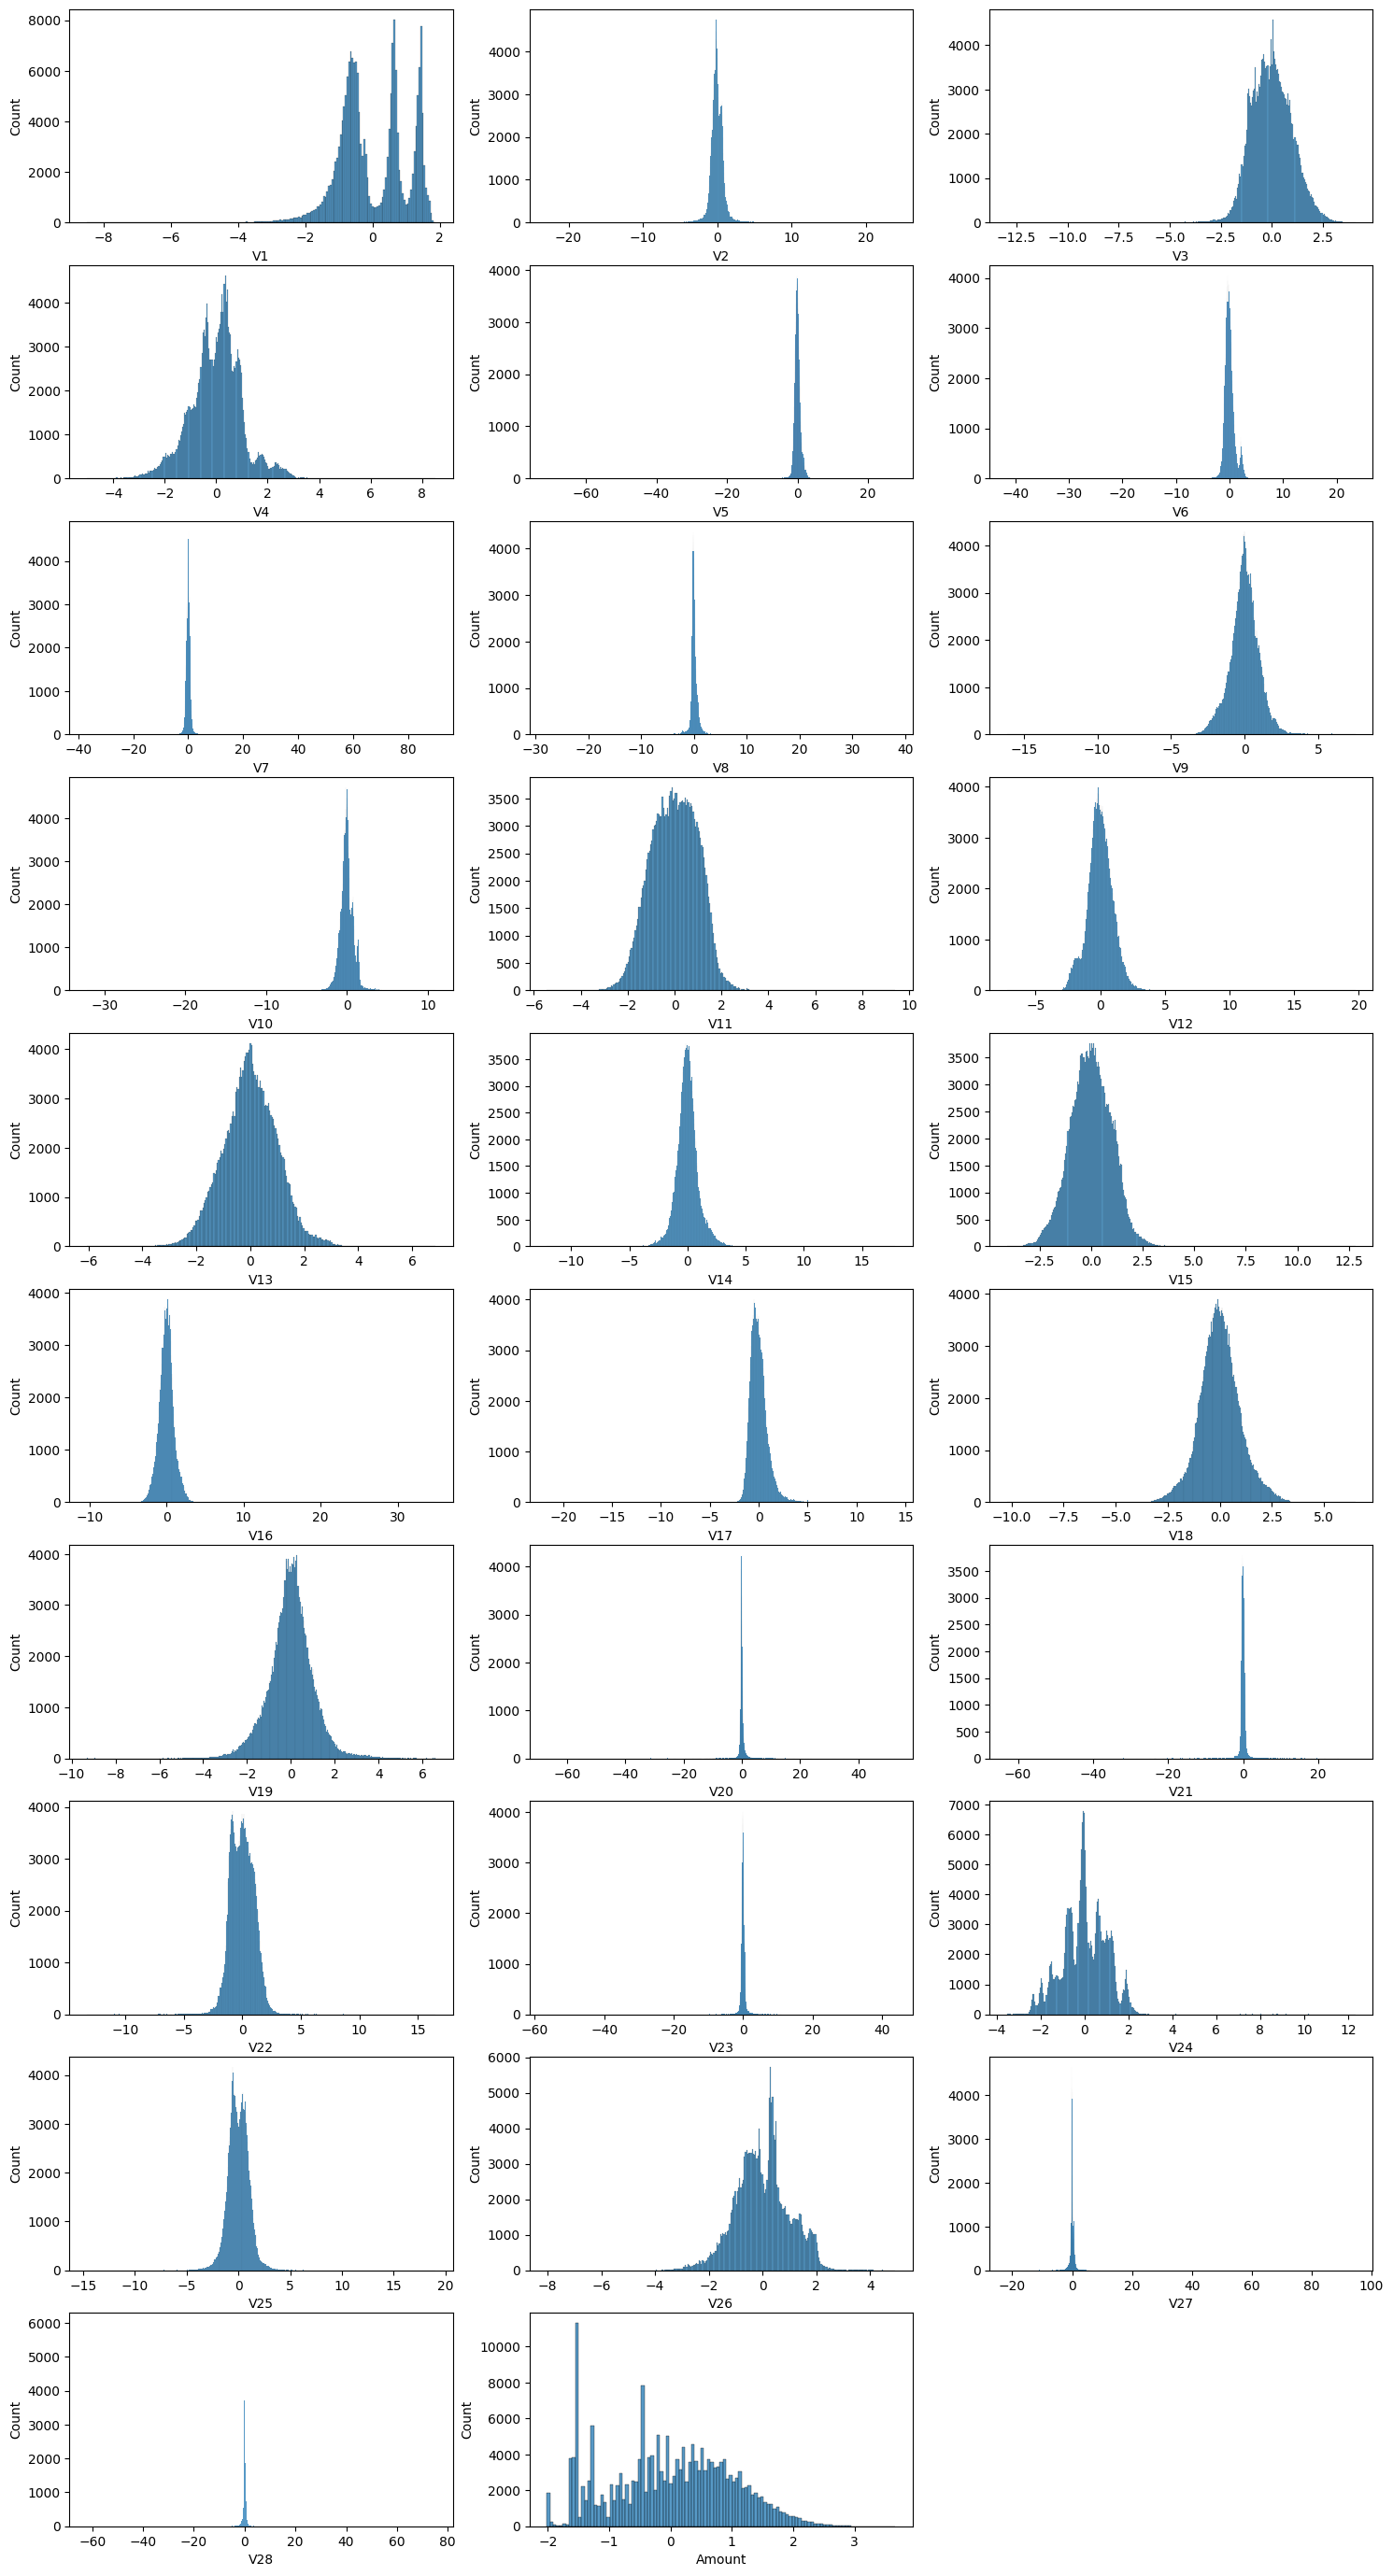

In [ ]:
# plot the histogram of a variable from the dataset again to see the result

plt.figure(figsize=(18,35))

plt.subplot(10,3,1)
sns.histplot(df2.V1)

plt.subplot(10,3,2)
sns.histplot(df2.V2)

plt.subplot(10,3,3)
sns.histplot(df2.V3)

plt.subplot(10,3,4)
sns.histplot(df2.V4)

plt.subplot(10,3,5)
sns.histplot(df2.V5)

plt.subplot(10,3,6)
sns.histplot(df2.V6)

plt.subplot(10,3,7)
sns.histplot(df2.V7)

plt.subplot(10,3,8)
sns.histplot(df2.V8)

plt.subplot(10,3,9)
sns.histplot(df2.V9)

plt.subplot(10,3,10)
sns.histplot(df2.V10)

plt.subplot(10,3,11)
sns.histplot(df2.V11)

plt.subplot(10,3,12)
sns.histplot(df2.V12)

plt.subplot(10,3,13)
sns.histplot(df2.V13)

plt.subplot(10,3,14)
sns.histplot(df2.V14)

plt.subplot(10,3,15)
sns.histplot(df2.V15)

plt.subplot(10,3,16)
sns.histplot(df2.V16)

plt.subplot(10,3,17)
sns.histplot(df2.V17)

plt.subplot(10,3,18)
sns.histplot(df2.V18)

plt.subplot(10,3,19)
sns.histplot(df2.V19)

plt.subplot(10,3,20)
sns.histplot(df2.V20)

plt.subplot(10,3,21)
sns.histplot(df2.V21)

plt.subplot(10,3,22)
sns.histplot(df2.V22)

plt.subplot(10,3,23)
sns.histplot(df2.V23)

plt.subplot(10,3,24)
sns.histplot(df2.V24)

plt.subplot(10,3,25)
sns.histplot(df2.V25)

plt.subplot(10,3,26)
sns.histplot(df2.V26)

plt.subplot(10,3,27)
sns.histplot(df2.V27)

plt.subplot(10,3,28)
sns.histplot(df2.V28)

plt.subplot(10,3,29)
sns.histplot(df2.Amount)

plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

In [ ]:
# Logistic Regression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [ ]:
#df_transormed = pt.fit_transform(df)

In [ ]:
#df_transormed = pd.DataFrame(df_transormed)
#df_transormed.columns = df.columns
#df_transormed.index = df.index
#df_transormed.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.904815,-0.131503,2.176074,0.983588,-0.256110,0.459227,0.193516,0.020305,0.380443,0.127074,...,0.323559,-0.007670,0.366644,-0.189647,0.015102,0.211929,-0.323884,0.323027,-0.053332,1.119013
1,0.626390,0.093067,-0.035062,0.387928,0.031947,0.045846,-0.063874,0.006711,-0.184488,-0.115195,...,-0.093203,-0.298760,-0.884170,0.153342,-0.637483,0.288440,0.353130,-0.035793,0.057491,-1.128464
2,-0.904242,-0.871858,1.381297,0.341811,-0.374492,1.320901,0.639714,0.172348,-1.453859,0.234324,...,0.680896,0.357879,1.069496,1.501808,-1.133450,-0.653607,-0.209953,-0.151417,-0.173752,1.623286
3,-0.742857,-0.202760,1.401049,-0.581136,-0.019151,0.983351,0.191907,0.309141,-1.319689,-0.008922,...,-0.273184,-0.133275,-0.013060,-0.317680,-1.756645,1.276336,-0.399896,0.144087,0.201524,1.012504
4,-0.823641,0.530197,1.160592,0.357540,-0.305614,0.187360,0.479194,-0.331706,0.769520,0.718432,...,0.528646,0.004660,1.107811,-0.232990,0.145885,-0.429239,1.053668,0.541488,0.669838,0.692981


In [ ]:
num_C =   #--> list of values
cv_num =   #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv
- y_train_cv
- y_test_cv

In [ ]:
#perform cross validation

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(), X = X_train_transformed, y = y_train).mean()

0.9992175124670508

In [ ]:
cross_val_score(LogisticRegression(), X = X_test_transformed, y = y_test)

array([0.99894669, 0.99923928, 0.99912224, 0.99894663, 0.9997074 ])

In [ ]:
#Performing Grid Search
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring = 'roc_auc',
                        cv = 4,
                        n_jobs = -1,
                        verbose=1,
                        return_train_score = True)

model_cv.fit(X_train_transformed, y_train)

print("Best Score is", model_cv.best_score_)
print("Best Params are", model_cv.best_params_)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
Best Score is 0.9744893096726054
Best Params are {'C': 0.01}


In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,1.211460,0.240027,0.037103,0.009261,0.01,{'C': 0.01},0.970405,0.961564,0.990108,0.975879,0.974489,0.010364,1,0.982520,0.983451,0.976921,0.983327,0.981555,0.002699
1,1.669213,0.262184,0.050380,0.004874,0.1,{'C': 0.1},0.967470,0.962578,0.988289,0.971567,0.972476,0.009668,2,0.981850,0.981582,0.975059,0.982646,0.980284,0.003042
2,1.203950,0.165421,0.027691,0.001162,1,{'C': 1},0.965688,0.962506,0.987682,0.970658,0.971634,0.009710,3,0.981577,0.980697,0.974210,0.981984,0.979617,0.003156
3,1.068978,0.068407,0.028097,0.001567,10,{'C': 10},0.965444,0.962488,0.987613,0.970560,0.971527,0.009726,4,0.981541,0.980588,0.974107,0.981897,0.979533,0.003169
4,1.123096,0.040676,0.031559,0.003768,100,{'C': 100},0.965420,0.962480,0.987607,0.970551,0.971514,0.009729,5,0.981537,0.980577,0.974098,0.981887,0.979525,0.003170
5,1.041741,0.090530,0.025231,0.004380,1000,{'C': 1000},0.965418,0.962480,0.987605,0.970550,0.971513,0.009729,6,0.981537,0.980576,0.974097,0.981886,0.979524,0.003170


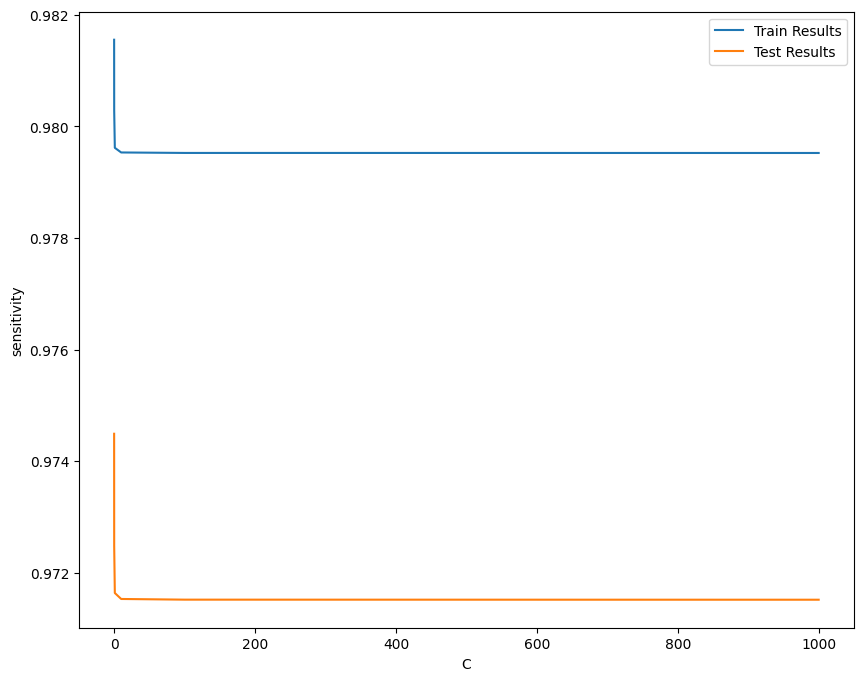

In [ ]:
plt.figure(figsize = [10,8])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['Train Results', 'Test Results'], loc = 'upper right')
plt.show()

Building the Logistic Regression Model with best parameter

In [ ]:
log_reg_imbal = LogisticRegression(C = 0.01)
log_reg_imbal.fit(X_train_transformed, y_train)

LogisticRegression(C=0.01)

Predicting the test values

In [ ]:
y_train_pred_logreg_imb = log_reg_imbal.predict(X_train_transformed)

In [ ]:
print("Train Score is ", metrics.roc_auc_score(y_train, y_train_pred_logreg_imb))

Train Score is  0.7990970042873325


In [ ]:
y_test_pred_logreg_imb = log_reg_imbal.predict(X_test_transformed)
print("Test Score is ", metrics.roc_auc_score(y_test, y_test_pred_logreg_imb))

Test Score is  0.8050767246188334


In [ ]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
y_train_pred_logreg_imb_proba = log_reg_imbal.predict_proba(X_train_transformed)[:,1]

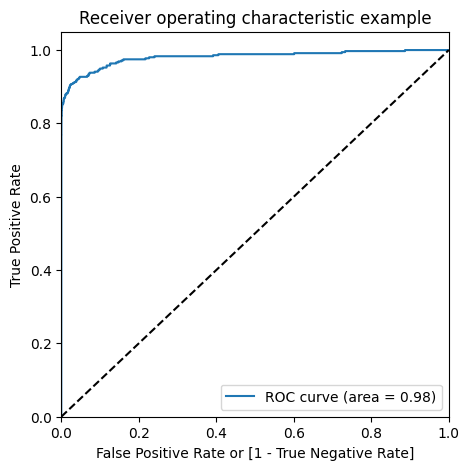

In [ ]:
draw_roc(y_train, y_train_pred_logreg_imb_proba)

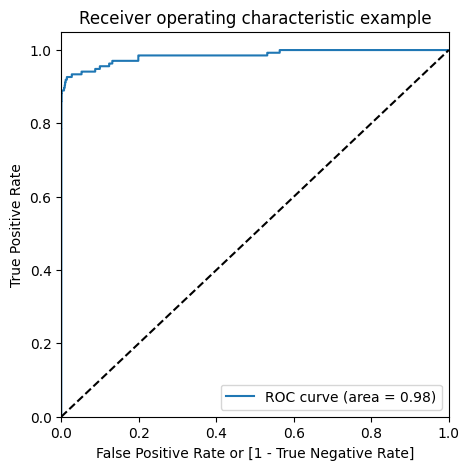

In [ ]:
y_test_pred_logreg_imb_proba = log_reg_imbal.predict_proba(X_test_transformed)[:,1]
draw_roc(y_test, y_test_pred_logreg_imb_proba)

Using Decision Tree Model

In [ ]:
params = {'max_depth': range(5,15,5),
          'min_samples_leaf': range(50,150,50),
          'min_samples_split': range(50,150,50)}

dt_imbal = DecisionTreeClassifier()

model_cv = GridSearchCV(estimator = dt_imbal,
                        param_grid = params,
                        scoring = 'roc_auc',
                        n_jobs = 1,
                        cv = 3,
                        return_train_score = True,
                        verbose = True)

model_cv.fit(X_train_transformed, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             return_train_score=True, scoring='roc_auc', verbose=True)

In [ ]:
print("Best Score is", model_cv.best_score_)
print("Best Params - ", model_cv.best_params_)

Best Score is 0.9358976688024502
Best Params -  {'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}


In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.649609,1.189816,0.024118,0.004462,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.913387,0.935934,0.946475,0.931932,0.013801,3,0.944914,0.953426,0.934182,0.944174,0.007874
1,4.206551,0.287462,0.022678,0.005003,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.913387,0.935916,0.946480,0.931928,0.013801,4,0.944914,0.953426,0.934182,0.944174,0.007874
2,4.252230,0.526735,0.022017,0.004100,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.923251,0.935589,0.948854,0.935898,0.010455,1,0.960190,0.953085,0.954642,0.955972,0.003050
3,4.192069,0.351094,0.022886,0.005479,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.923251,0.935589,0.948854,0.935898,0.010455,1,0.960190,0.953085,0.954642,0.955972,0.003050
4,8.330648,0.546810,0.029182,0.005265,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.920198,0.915701,0.935537,0.923812,0.008492,7,0.972140,0.987797,0.987956,0.982631,0.007419
5,8.285288,0.218198,0.025007,0.005914,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.920206,0.931991,0.918974,0.923724,0.005868,8,0.972140,0.987797,0.987956,0.982631,0.007419
6,8.150516,0.348037,0.025975,0.006608,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.920183,0.947523,0.914620,0.927442,0.014380,6,0.986145,0.987229,0.975180,0.982851,0.005443
7,8.200066,0.524826,0.021332,0.000327,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.928147,0.947558,0.914627,0.930111,0.013515,5,0.986114,0.987229,0.975184,0.982842,0.005435


Decision Tree with best parameters

In [ ]:
dt_imb_model = DecisionTreeClassifier(criterion = 'gini',
                                      max_depth = 5,
                                      min_samples_leaf = 100,
                                      min_samples_split = 50,
                                      random_state=100)
dt_imb_model.fit(X_train_transformed, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

In [ ]:
y_train_pred_dt_imb = dt_imb_model.predict(X_train_transformed)
y_test_pred_dt_imb = dt_imb_model.predict(X_test_transformed)

Performance on Train Set

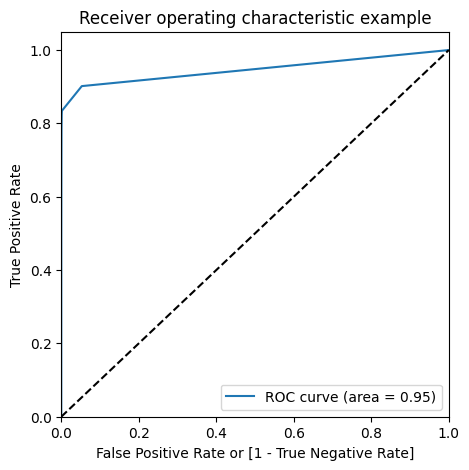

In [ ]:
y_train_pred_dt_imb_proba = dt_imb_model.predict_proba(X_train_transformed)[:, 1]
draw_roc(y_train, y_train_pred_dt_imb_proba)

Performance on Test Set

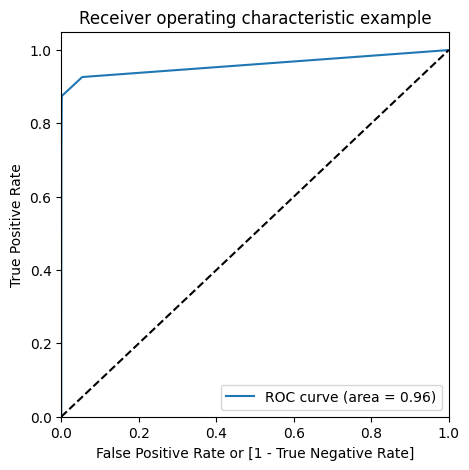

In [ ]:
y_test_pred_dt_imb_proba = dt_imb_model.predict_proba(X_test_transformed)[:, 1]
draw_roc(y_test, y_test_pred_dt_imb_proba)

Building Random Forest Model on the Dataset

In [ ]:
fold = 3

rf = RandomForestClassifier(random_state = 42)

params = {'n_estimators': [20, 50, 100],
          'min_samples_leaf': [50, 100, 150],
          'min_samples_split': [50, 100, 150],}

model_cv = GridSearchCV(estimator = rf,
                        param_grid = params,
                        scoring = 'roc_auc',
                        cv = fold,
                        n_jobs = 1,
                        verbose = -1,
                        return_train_score = True)



In [ ]:
model_cv.fit(X_train_transformed, y_train)

In [ ]:
print("Best Score - ", model_cv.best_score_)
print("Best Params - ", model_cv.best_params_)
print("Best Estimator - ", model_cv.best_estimator_)

XGBoost

In [ ]:
# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_transformed, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9781775421930977
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [ ]:
# Printing best parameters
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.6}

In [ ]:
# Printing best parameters
params = {'learning_rate': 0.2,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train_transformed, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:49:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "params" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

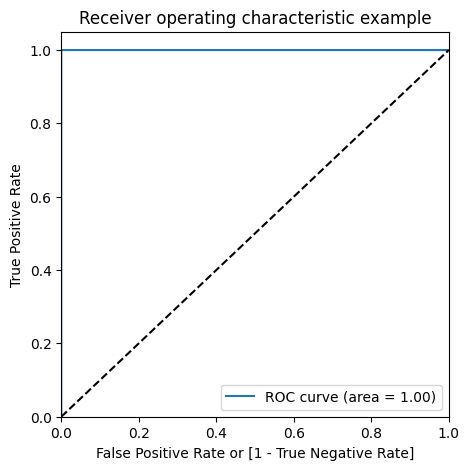

In [ ]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train_transformed)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

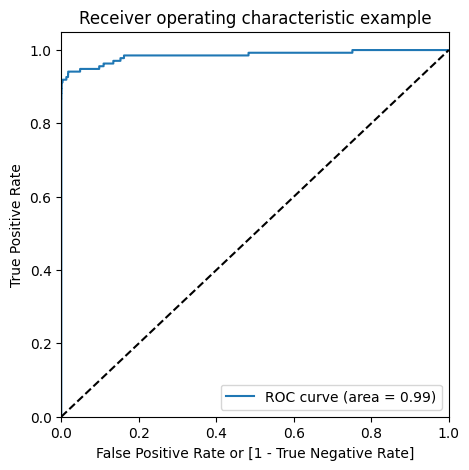

In [ ]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test_transformed)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

#### Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

Proceeding with the best performing model i.e. XGBoost

In [ ]:
params = {'learning_rate': 0.2,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

In [ ]:
clf =   XGBClassifier(params = params) #initialise the model with optimum hyperparameters
clf.fit(X_train_transformed, y_train)
#print --> #print the evaluation score on the X_test by choosing the best evaluation metric

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:46:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "params" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 7
3rd Top var = 10


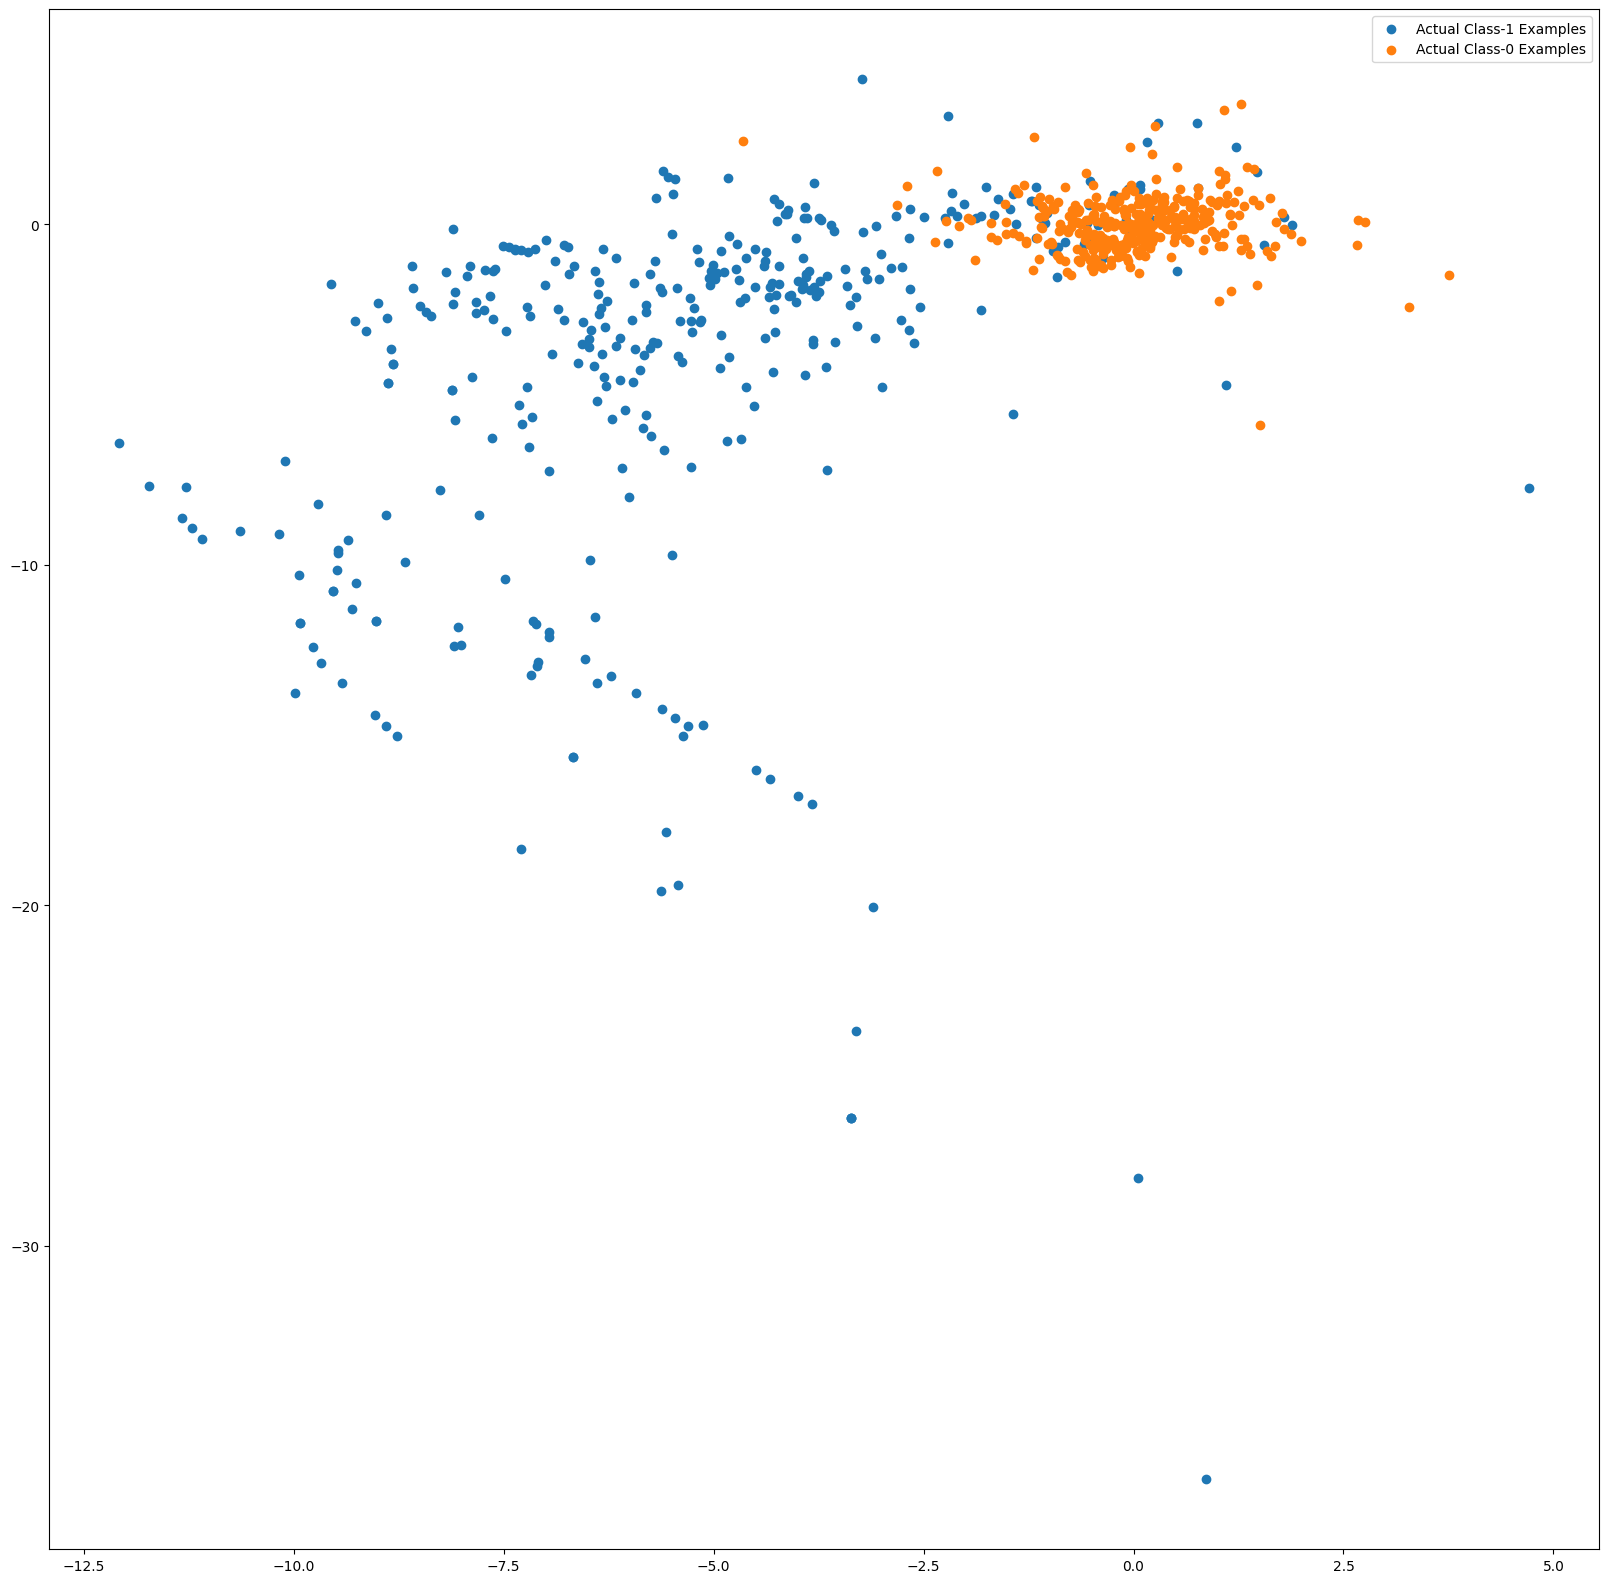

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train_transformed[np.where(y_train==1.0)]
X_train_0 = X_train_transformed[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

Using Random Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversmpl = RandomOverSampler(sampling_strategy='minority')

X_over, y_over = oversmpl.fit_resample(X_train_transformed, y_train)

In [ ]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_over))

Before sampling class distribution:- Counter({0: 199008, 1: 356})
New class distribution:- Counter({0: 199008, 1: 199008})


Building Logistic Regression Model with Oversampling

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_over, y_over)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.986442250373518
Best hyperparameters:  {'C': 1000}


In [ ]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.011372,0.190020,0.039503,0.018207,0.01,{'C': 0.01},0.986305,0.986151,0.985893,0.986583,...,0.986238,0.000224,6,0.986276,0.986340,0.986272,0.986182,0.986181,0.986250,0.000061
1,1.328475,0.352236,0.035201,0.009797,0.1,{'C': 0.1},0.986499,0.986318,0.986093,0.986746,...,0.986419,0.000214,5,0.986459,0.986530,0.986459,0.986365,0.986365,0.986436,0.000063
2,1.005163,0.105675,0.027498,0.007747,1,{'C': 1},0.986518,0.986335,0.986117,0.986767,...,0.986440,0.000214,4,0.986478,0.986549,0.986479,0.986384,0.986385,0.986455,0.000063
3,1.256437,0.333085,0.027656,0.005383,10,{'C': 10},0.986520,0.986336,0.986120,0.986768,...,0.986442,0.000214,3,0.986481,0.986551,0.986482,0.986386,0.986387,0.986457,0.000063
4,0.968138,0.062629,0.023050,0.000259,100,{'C': 100},0.986520,0.986336,0.986120,0.986769,...,0.986442,0.000214,2,0.986481,0.986551,0.986482,0.986386,0.986387,0.986457,0.000063
5,1.309945,0.319360,0.031057,0.010030,1000,{'C': 1000},0.986520,0.986336,0.986120,0.986769,...,0.986442,0.000214,1,0.986481,0.986551,0.986482,0.986386,0.986387,0.986457,0.000063


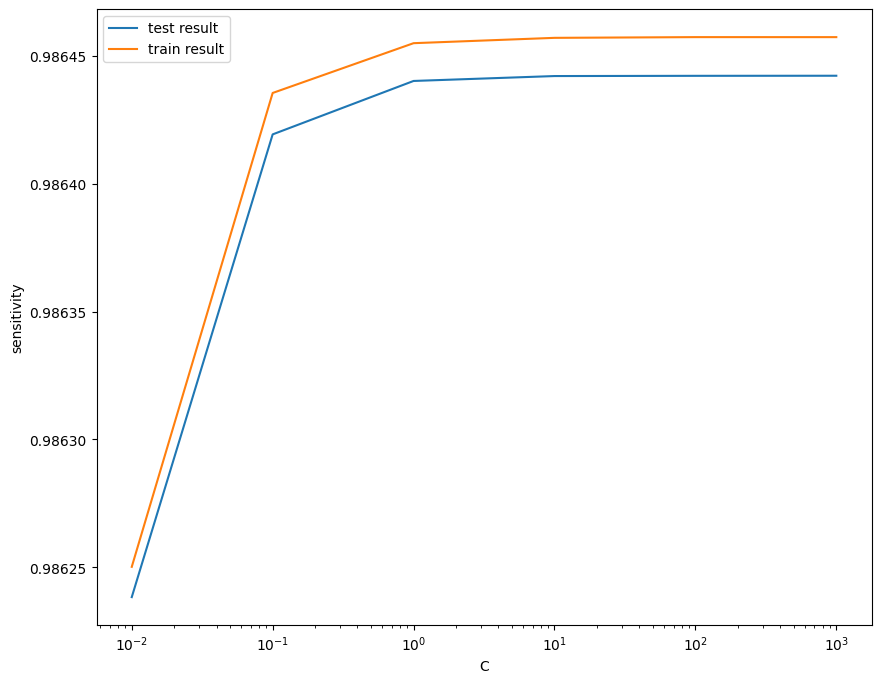

In [ ]:
# plot of C versus train and validation scores
plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

Logistic Regression with hyperparameter tuning

In [ ]:
model_cv.best_params_

{'C': 1000}

In [ ]:
# Instantiating the model
logreg_over = LogisticRegression(C=1000)

# Fitting the model with train data
logreg_over_model = logreg_over.fit(X_over, y_over)

Evaluating the model on train data

In [ ]:
# Predictions on the train set
y_train_pred = logreg_over_model.predict(X_over)

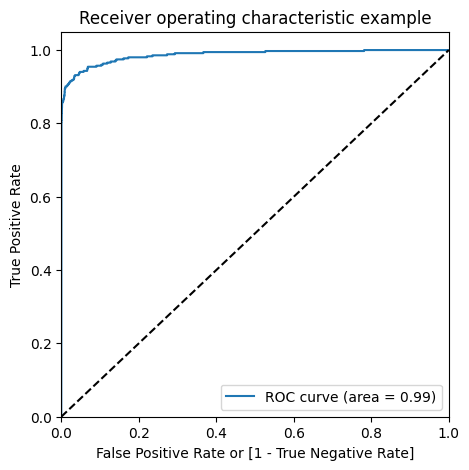

In [ ]:
y_train_pred_proba = logreg_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

Evaluating on test data

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


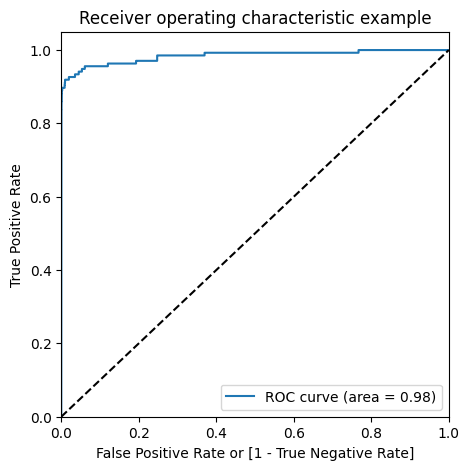

In [ ]:
# Predicted probability
y_test_pred_proba = logreg_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

2. Decision Tree with Random Oversampling

In [ ]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_over,y_over)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.998463661644899
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


Decision Tree with optimal hyperparameters

In [ ]:
# Model with optimal hyperparameters
dt_over_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_over_model.fit(X_over, y_over)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

Model evatuation on train data

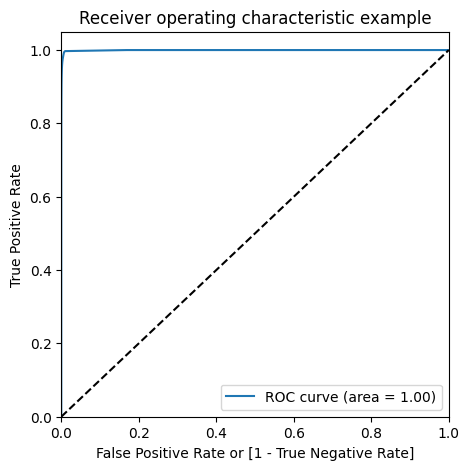

In [ ]:
# Predicted probability
y_train_pred_proba = dt_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

Predictions on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


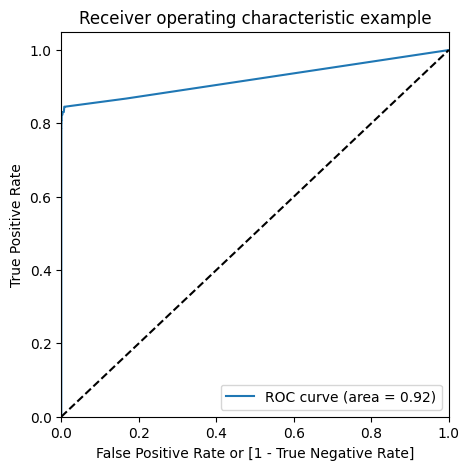

In [ ]:
# Predicted probability
y_test_pred_proba = dt_over_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

3. XGBoost with Random Oversampling

In [ ]:
# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_over, y_over)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.641569,1.222102,0.125766,0.001572,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999900,0.999889,0.999883,0.999891,0.000007,4,0.999891,0.999886,0.999920,0.999899,1.505734e-05
1,5.067451,1.718101,0.145118,0.028359,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999902,0.999873,0.999855,0.999877,0.000019,5,0.999886,0.999873,0.999909,0.999889,1.473606e-05
2,4.619706,1.288549,0.147645,0.031543,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999893,0.999871,0.999832,0.999866,0.000025,6,0.999884,0.999868,0.999886,0.999879,7.979875e-06
3,5.496181,1.215844,0.127795,0.004678,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999985,0.999979,0.999974,0.999979,0.000005,2,0.999997,0.999991,0.999995,0.999995,2.423928e-06
4,4.753497,1.294446,0.129950,0.004342,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999994,0.999981,0.999958,0.999977,0.000015,3,0.999997,0.999997,0.999998,0.999997,4.349375e-07
5,4.443476,0.591098,0.156977,0.046326,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999995,0.999986,0.999976,0.999986,0.000008,1,0.999998,0.999996,1.000000,0.999998,1.770968e-06


In [ ]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

XGBoost with optimal hyperparameter

In [ ]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_over_model = XGBClassifier(params = params)
xgb_over_model.fit(X_over, y_over)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:57:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "params" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

Model evatuation on train data

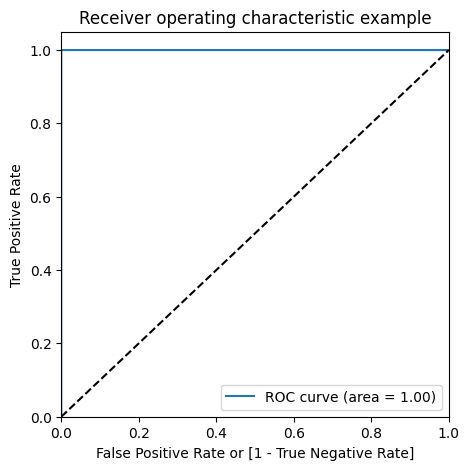

In [ ]:
# Predicted probability
y_train_pred_proba = xgb_over_model.predict_proba(X_over)[:,1]

# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

Model evaluation on the test set

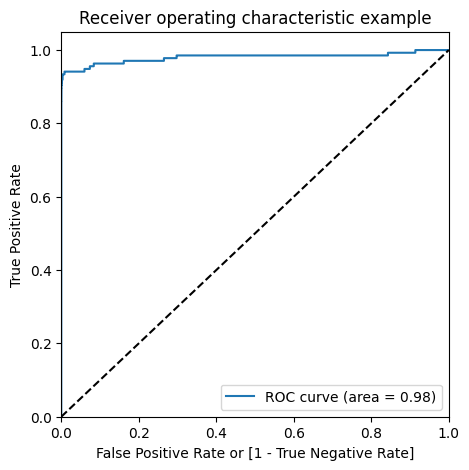

In [ ]:
# Predicted probability
y_test_pred_proba = xgb_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

SMOTE (Synthetic Minority Oversampling Technique)

Print the class distribution after applying SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train_transformed, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do


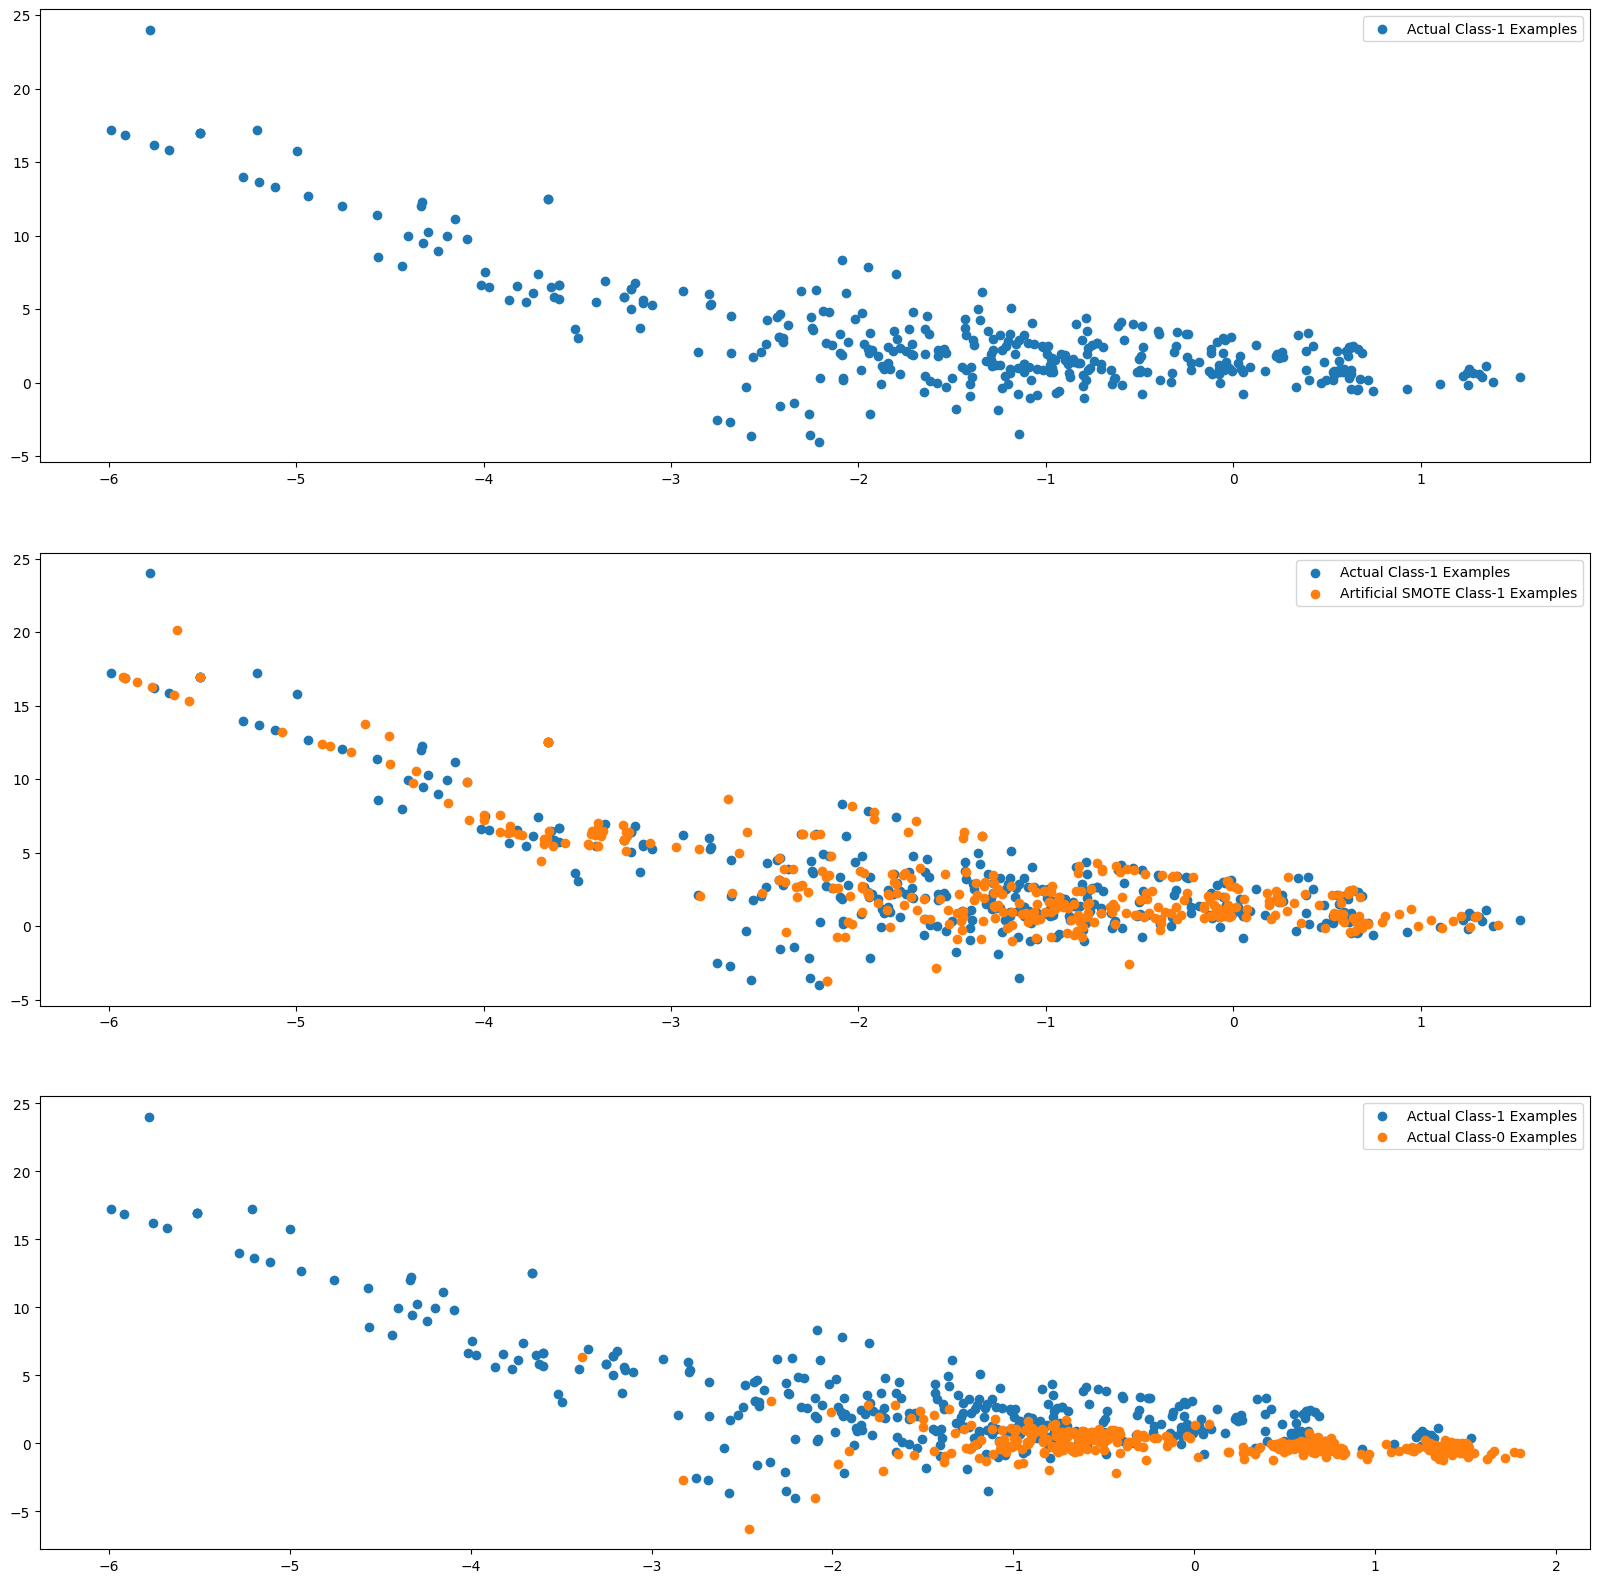

In [ ]:
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train_transformed.shape[0]:]

X_train_1 = X_train_transformed[np.where(y_train==1.0)]
X_train_0 = X_train_transformed[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(pd.DataFrame(X_train_smote_1).iloc[:X_train_1.shape[0], 0], pd.DataFrame(X_train_smote_1).iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

1. Logistic Regression on balanced data with SMOTE

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9890046986596139
Best hyperparameters:  {'C': 100}


In [ ]:
# Printing best params
model_cv.best_params_

{'C': 100}

In [ ]:
# Instantiating the model
logreg_smote_model = LogisticRegression(C=100)

# Fitting the model with balanced data
logreg_smote_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=100)

Evaluating the model on train data

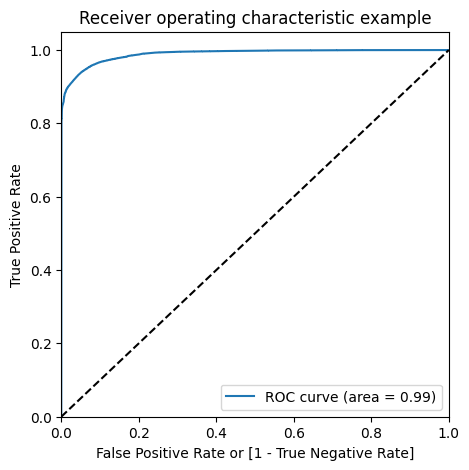

In [ ]:
# Predicted probability
y_train_pred_proba_smote = logreg_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_smote)

Evaluating on test data

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


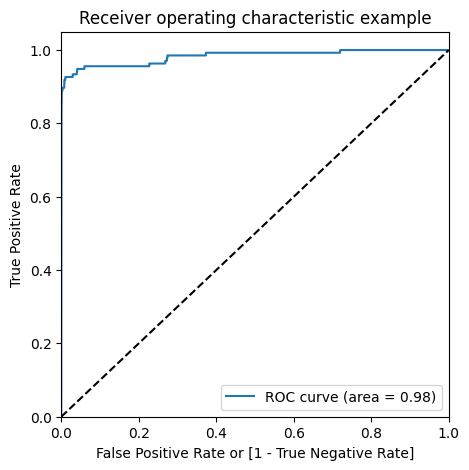

In [ ]:
# Predicted probability
y_test_pred_proba_smote = logreg_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_smote)

2. Decision Tree on balanced data with SMOTE

In [ ]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}

In [ ]:
# Model with optimal hyperparameters
dt_smote_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

Evaluating the model on train data

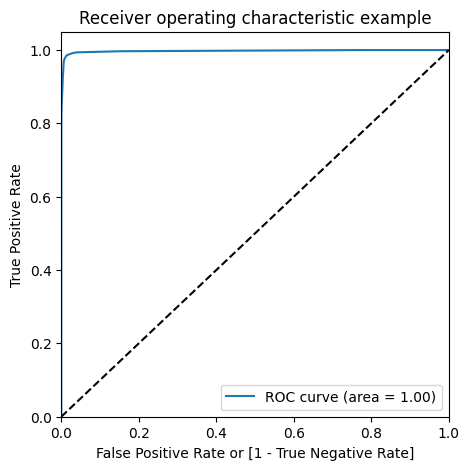

In [ ]:
# Predicted probability
y_train_pred_proba = dt_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

Evaluating the model on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


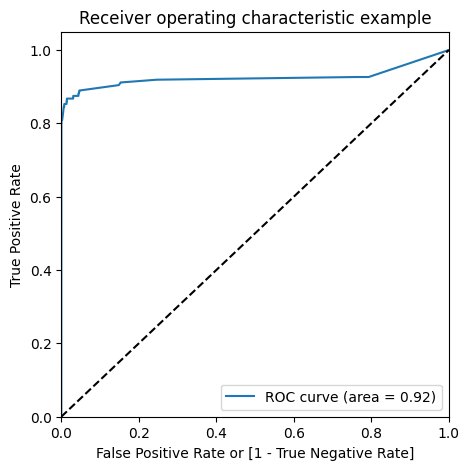

In [ ]:
# Predicted probability
y_test_pred_smote = dt_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_smote)

3. XGBoost on balanced data with SMOTE

In [ ]:
# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999413409326589
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [ ]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_smote_model = XGBClassifier(params = params)
xgb_smote_model.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:19:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "params" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

Evaluating the model on the train data

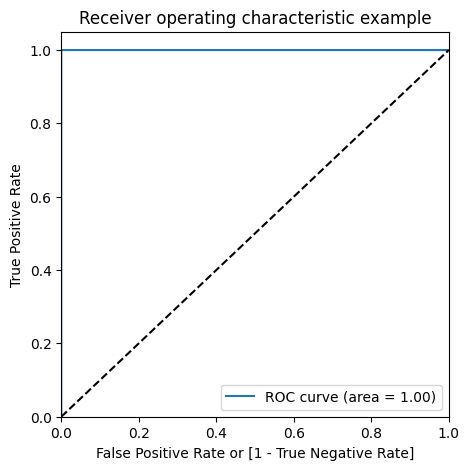

In [ ]:
# Predicted probability
y_train_pred_proba = xgb_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

Evaluating the model on test data

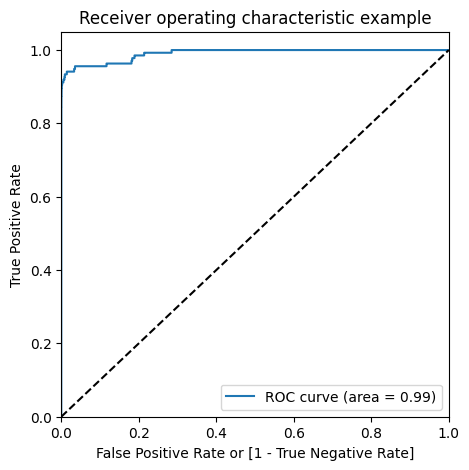

In [ ]:
# Predicted probability
y_test_pred_proba = xgb_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

ADASYN (Adaptive Synthetic Sampling)

Print the class distribution after applying ADASYN

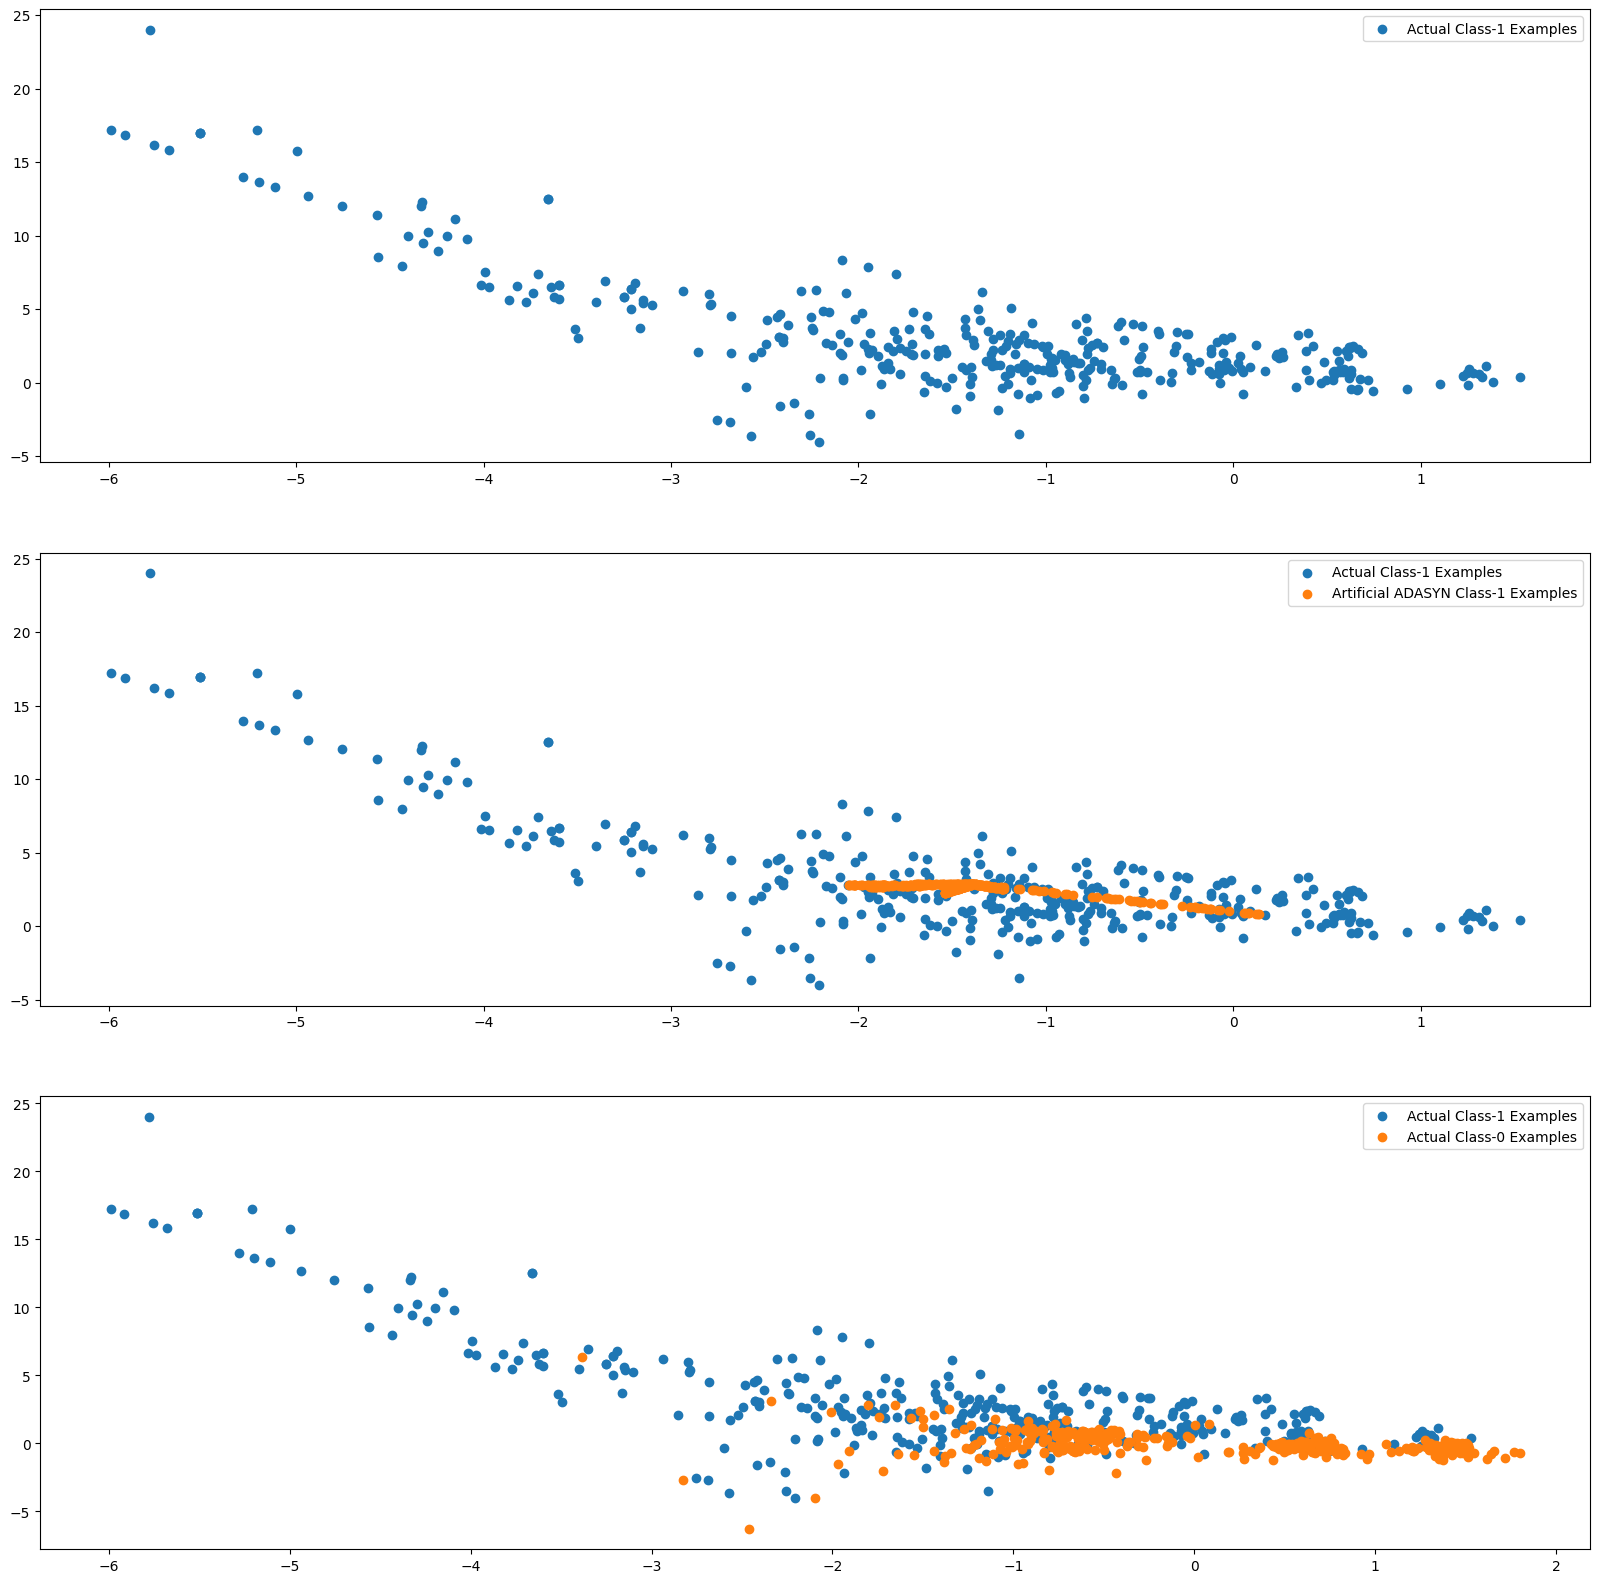

In [ ]:
from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train_transformed, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train_transformed[np.where(y_train==1.0)]
X_train_0 = X_train_transformed[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(pd.DataFrame(X_train_adasyn_1).iloc[:X_train_1.shape[0], 0], pd.DataFrame(X_train_adasyn_1).iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

1. Logistic Regression on balanced data with ADASYN

In [ ]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)



Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best ROC AUC score:  0.9636109046900202
Best hyperparameters:  {'C': 1000}


In [ ]:
model_cv.best_params_

{'C': 1000}

In [ ]:
# Instantiating the model
logreg_adasyn_model = LogisticRegression(C=1000)

# Fitting the model
logreg_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=1000)

Evaluating the model with train data

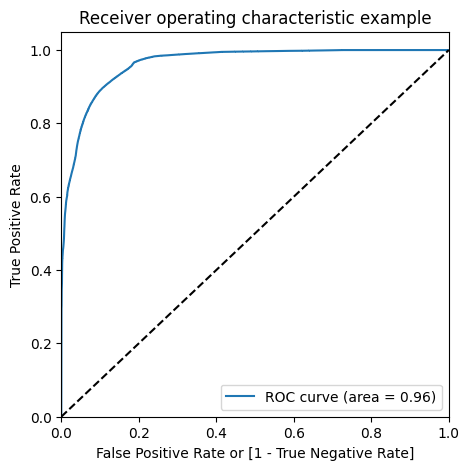

In [ ]:
# Predicted probability
y_train_pred_proba = logreg_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

Evaluating on test data

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


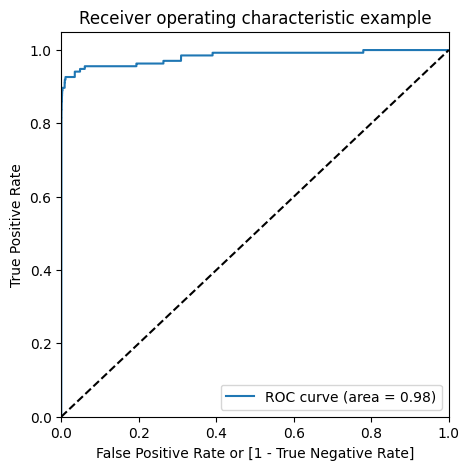

In [ ]:
# Predicted probability
y_test_pred_proba = logreg_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

2. Decision Tree on balanced data with ADASYN

In [ ]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 5,
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.939392679853379
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


Model with optimal hyperparameters

In [ ]:
# Model with optimal hyperparameters
dt_adasyn_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

Evaluating the model on train data

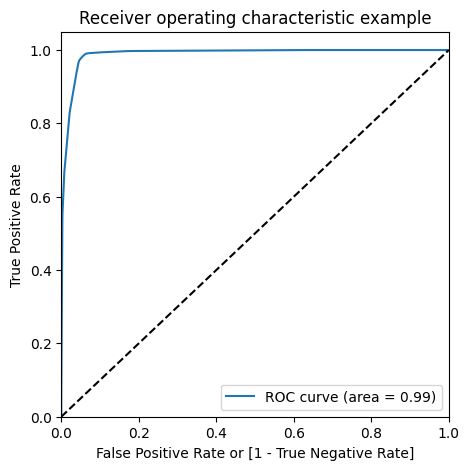

In [ ]:
# Predicted probability
y_train_pred_proba = dt_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

Evaluating the model on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


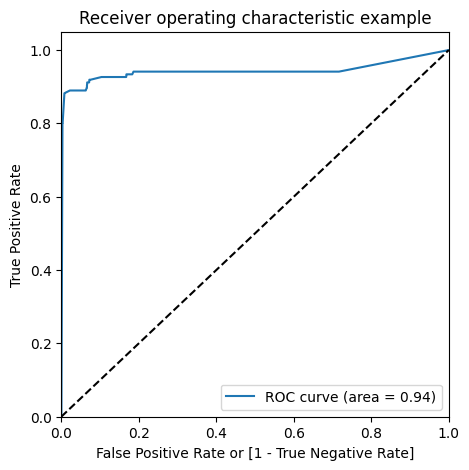

In [ ]:
# Predicted probability
y_test_pred_proba = dt_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

3. XGBoost on balanced data with ADASYN

In [ ]:
# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9875292820866367
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [ ]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# Model with optimal hyperparameter
xgb_adasyn_model = XGBClassifier(params = params)
xgb_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:34:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "params" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

Evaluating the model on the train data

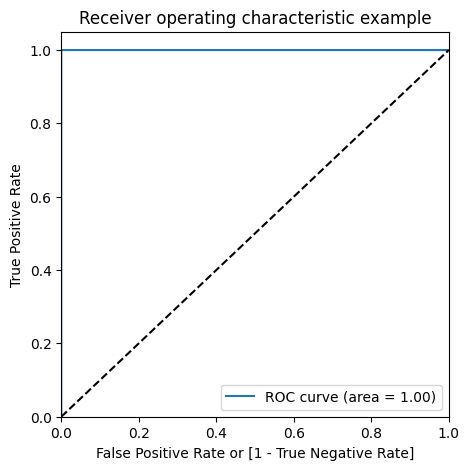

In [ ]:
# Predicted probability
y_train_pred_proba = xgb_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

Evaluating the model on test data

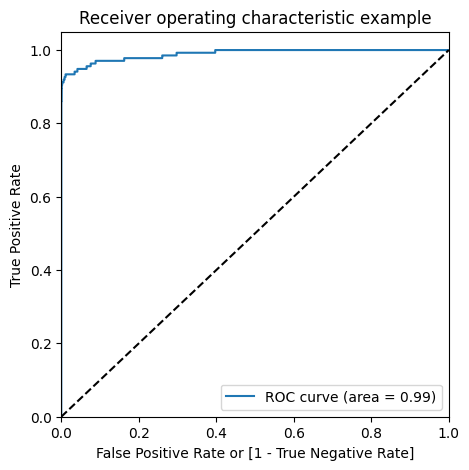

In [ ]:
# Predicted probability
y_test_pred_proba = xgb_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

In [ ]:
y_pred = xgb_adasyn_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.64      0.86      0.73       136

    accuracy                           1.00     85443
   macro avg       0.82      0.93      0.87     85443
weighted avg       1.00      1.00      1.00     85443



Select the oversampling method which shows the best result on a model
We have used several balancing technique to solve the minority class imbalance. We have used Random Oversampling, SMOTE, and Adasyn technique to balance the dataset and then we performed logistic regression, random forest and XGBoost algorithms to build models on each sampling method.

After conducting the experiment on each oversampling method, we have found that XGBoost model is performing well on the dataset which is balanced with AdaSyn technique. We got ROC score 100% on train data and 99% on the test data.

Hence, we conclude that the XGBoost model with Adasyn is the best model.

Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


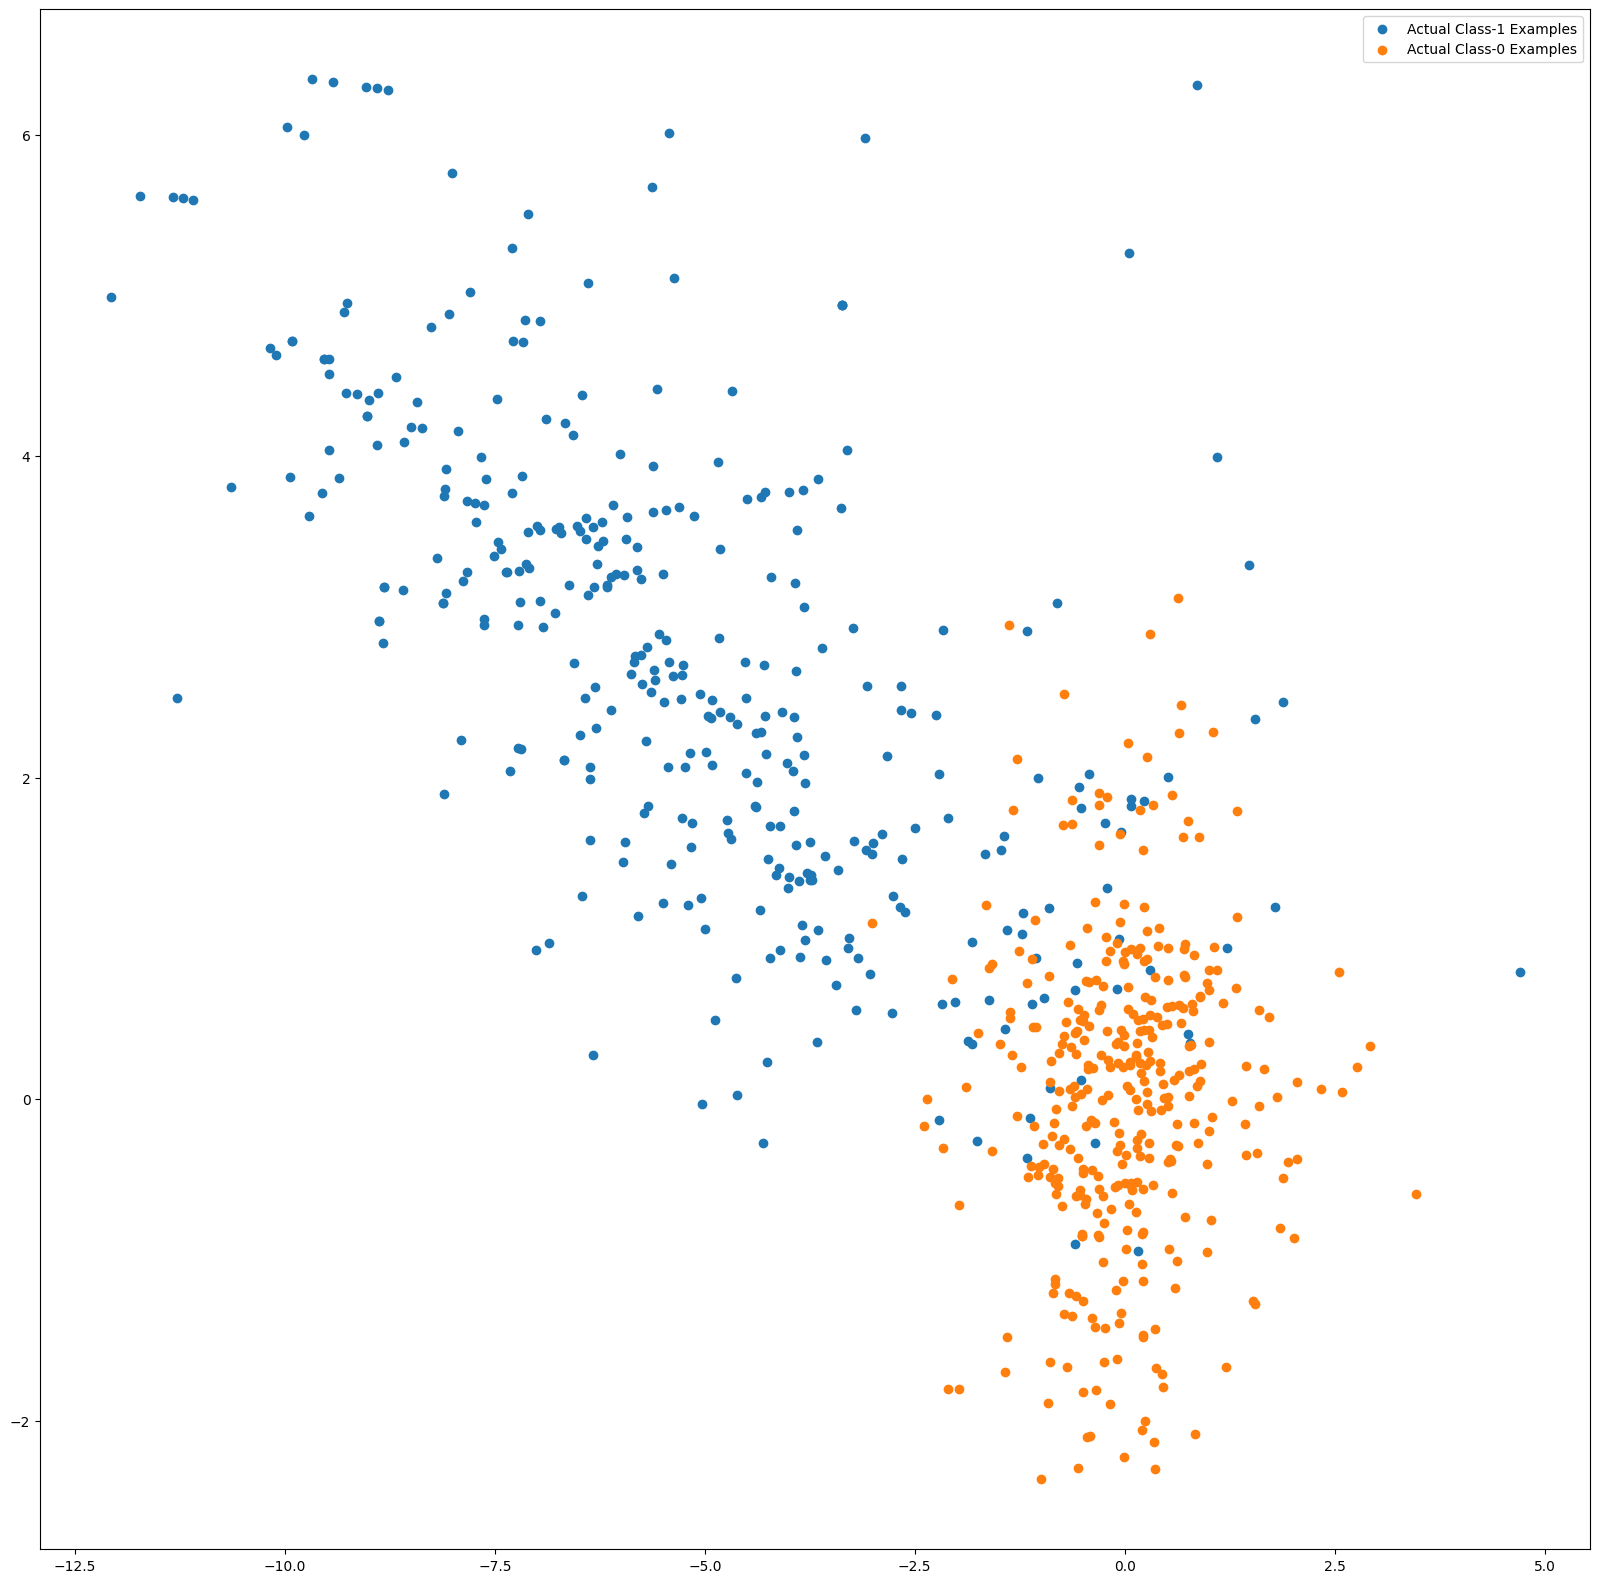

In [ ]:
var_imp = []
for i in xgb_adasyn_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])

X_train_1 = X_train_transformed[np.where(y_train==1.0)]
X_train_0 = X_train_transformed[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_proba )
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 1.0
0.9074581


Summary to the business

Here, we have to focus on a high recall in order to detect actual fraudulent transactions in order to save the banks from high-value fraudulent transactions,

After performing several models, we have seen that in the balanced dataset with ADASYN technique the XGBoost model has good ROC score(99%) and also high Recall(86%). Hence, we can go with the XGBoost model here.